<h1>Importing Libraries</h1>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

<h1>DATA FRAME</h1>

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')

In [6]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [7]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   category
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 20.3 KB


<h1>Bar Plot</h1>

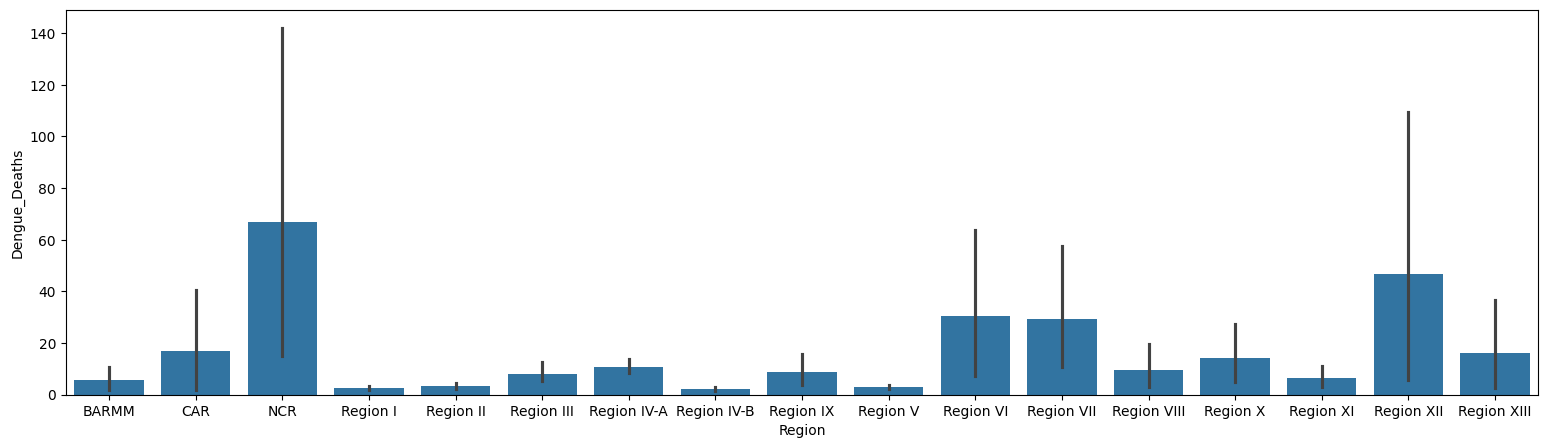

In [8]:
sns.barplot(data=dengue, x="Region", y="Dengue_Deaths")
plt.gcf().set_size_inches(19, 5) 
plt.show()

<h1>Line Plot</h1>

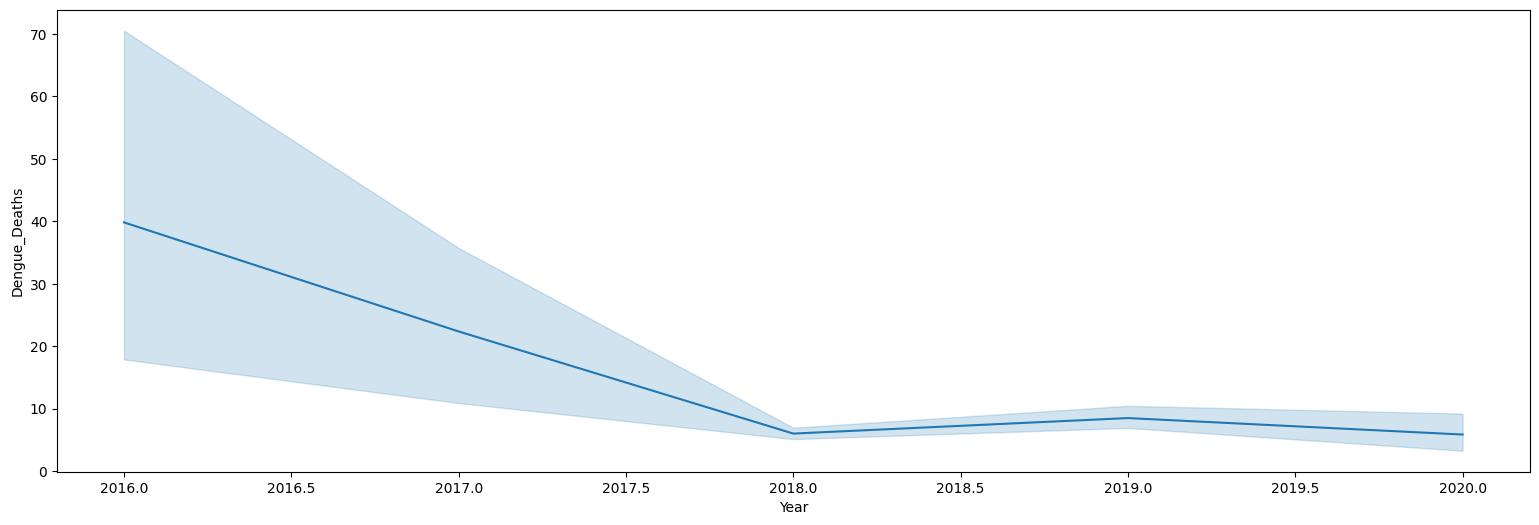

In [9]:
sns.lineplot(data=dengue, y="Dengue_Deaths", x="Year")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Scatter Plot</h1>

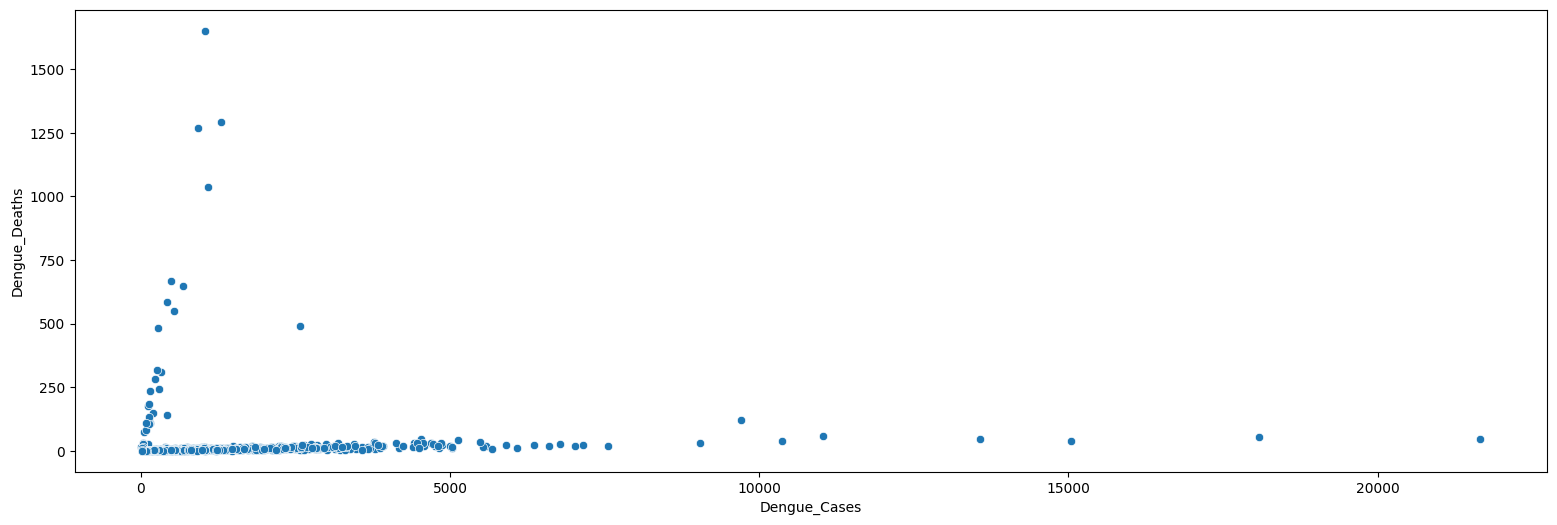

In [10]:
sns.scatterplot(data=dengue, y="Dengue_Deaths", x="Dengue_Cases")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Box Plot</h1>

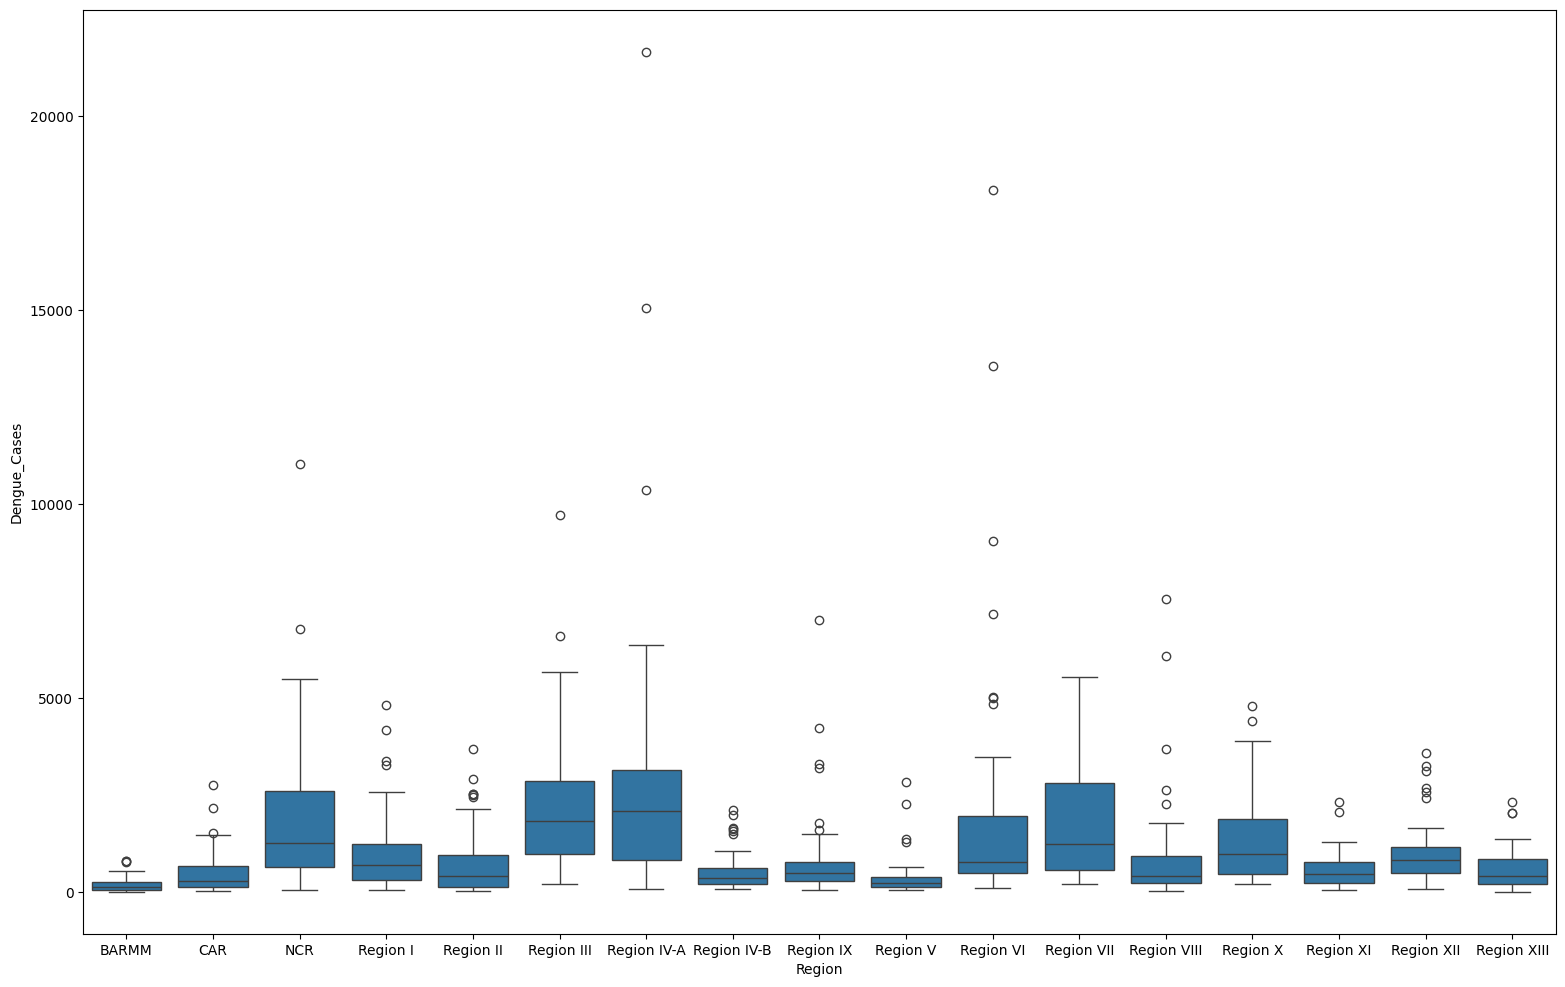

In [11]:
sns.boxplot(data=dengue, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 12)
plt.show()

In [12]:
dengue_V2 = dengue[dengue["Year"] != '2019-01-01']
dengue_V2

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


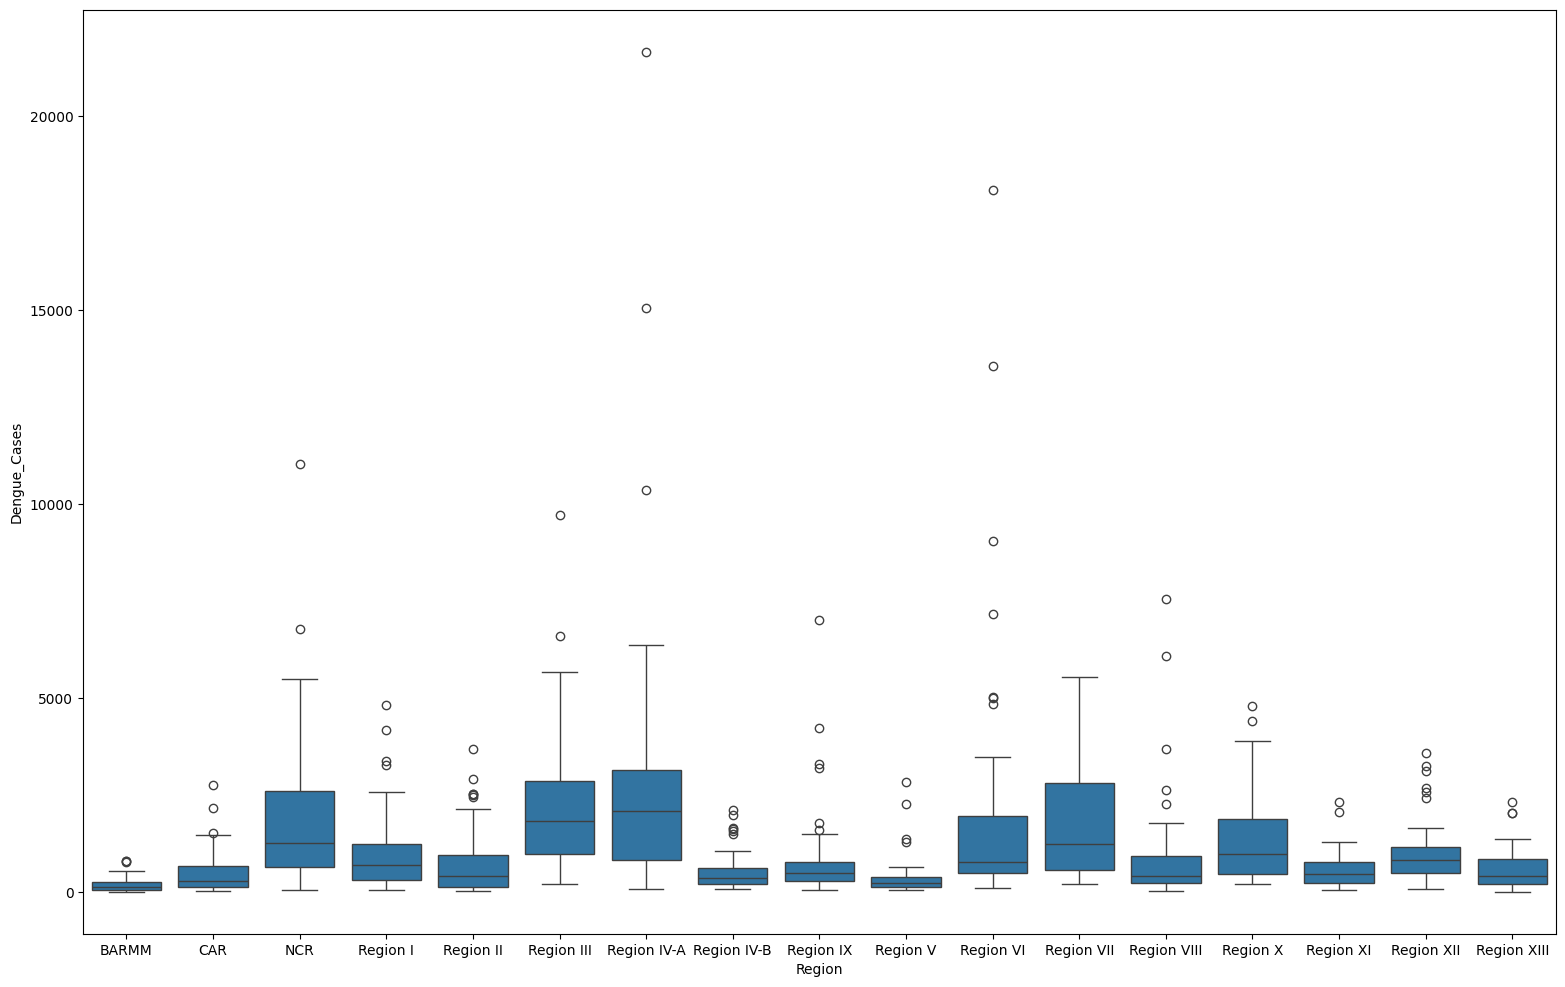

In [13]:
sns.boxplot(data=dengue_V2, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 12)
plt.show()

<h1>Violin Plot</h1>

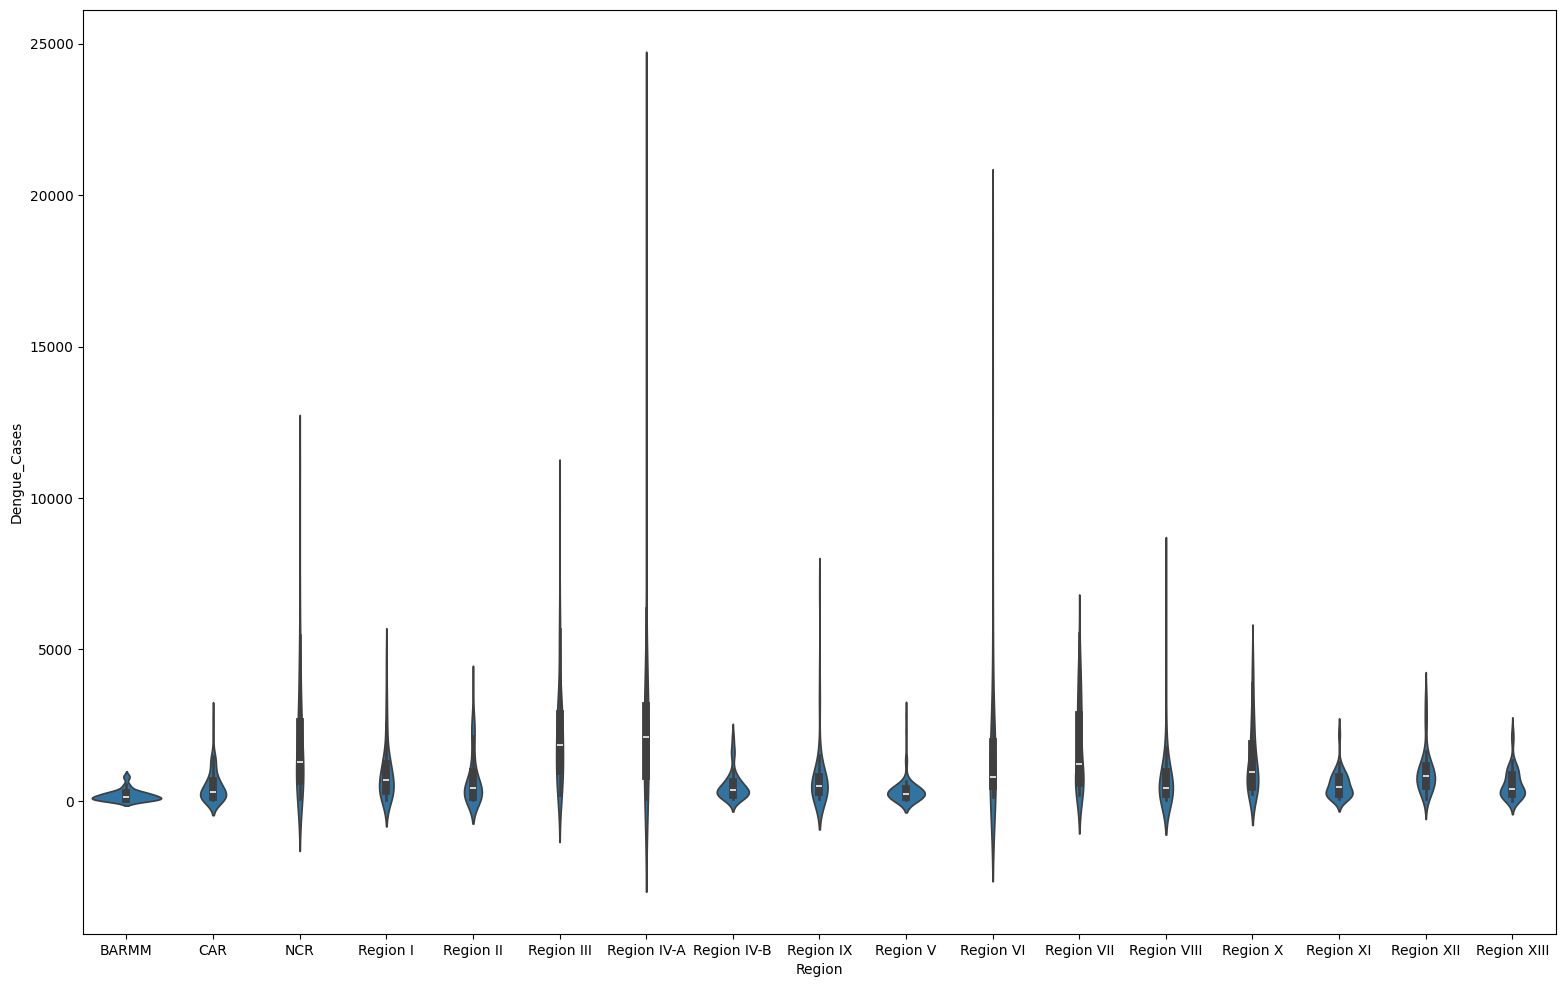

In [14]:
sns.violinplot(data=dengue_V2, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 12)
plt.show()

<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\1852721107.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()


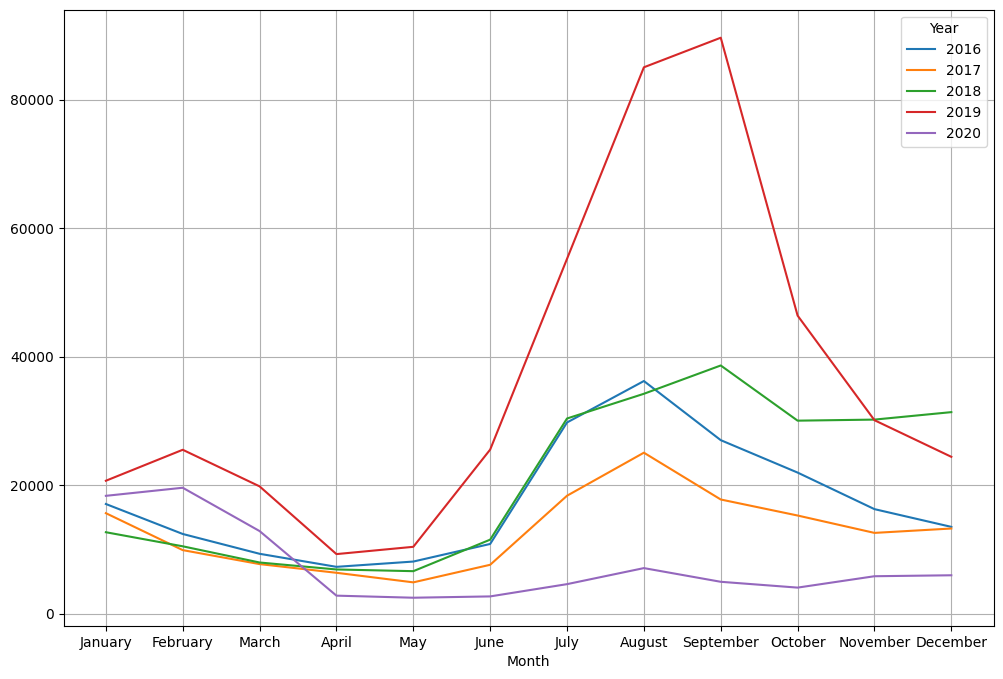

In [15]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

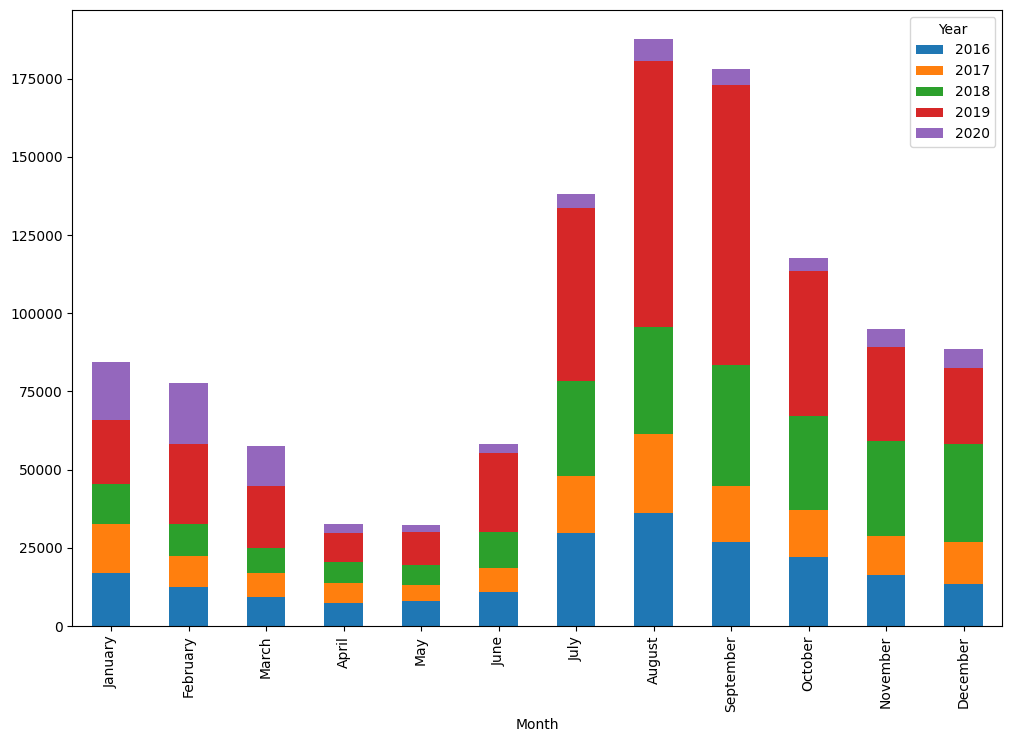

In [16]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

<h1> Mortality Rate per each Region </h1>

In [17]:
Regional_Death = dengue.groupby(["Region"])
Regional_Death = dengue.groupby(["Region"])[["Dengue_Cases", "Dengue_Deaths"]].sum()
Regional_Death

C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\3070656349.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Regional_Death = dengue.groupby(["Region"])
C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\3070656349.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Regional_Death = dengue.groupby(["Region"])[["Dengue_Cases", "Dengue_Deaths"]].sum()


,Dengue_Cases,Dengue_Deaths
Region,,
BARMM,11537,332
CAR,30582,1008
NCR,115966,4008
Region I,59066,157
Region II,45141,193
Region III,131064,482
Region IV-A,163029,652
Region IV-B,30849,130
Region IX,47781,532


In [18]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)
Regional_Death

,Dengue_Cases,Dengue_Deaths,Mortality_Rate
Region,,,
BARMM,11537,332,2.88
CAR,30582,1008,3.30
NCR,115966,4008,3.46
Region I,59066,157,0.27
Region II,45141,193,0.43
Region III,131064,482,0.37
Region IV-A,163029,652,0.40
Region IV-B,30849,130,0.42
Region IX,47781,532,1.11


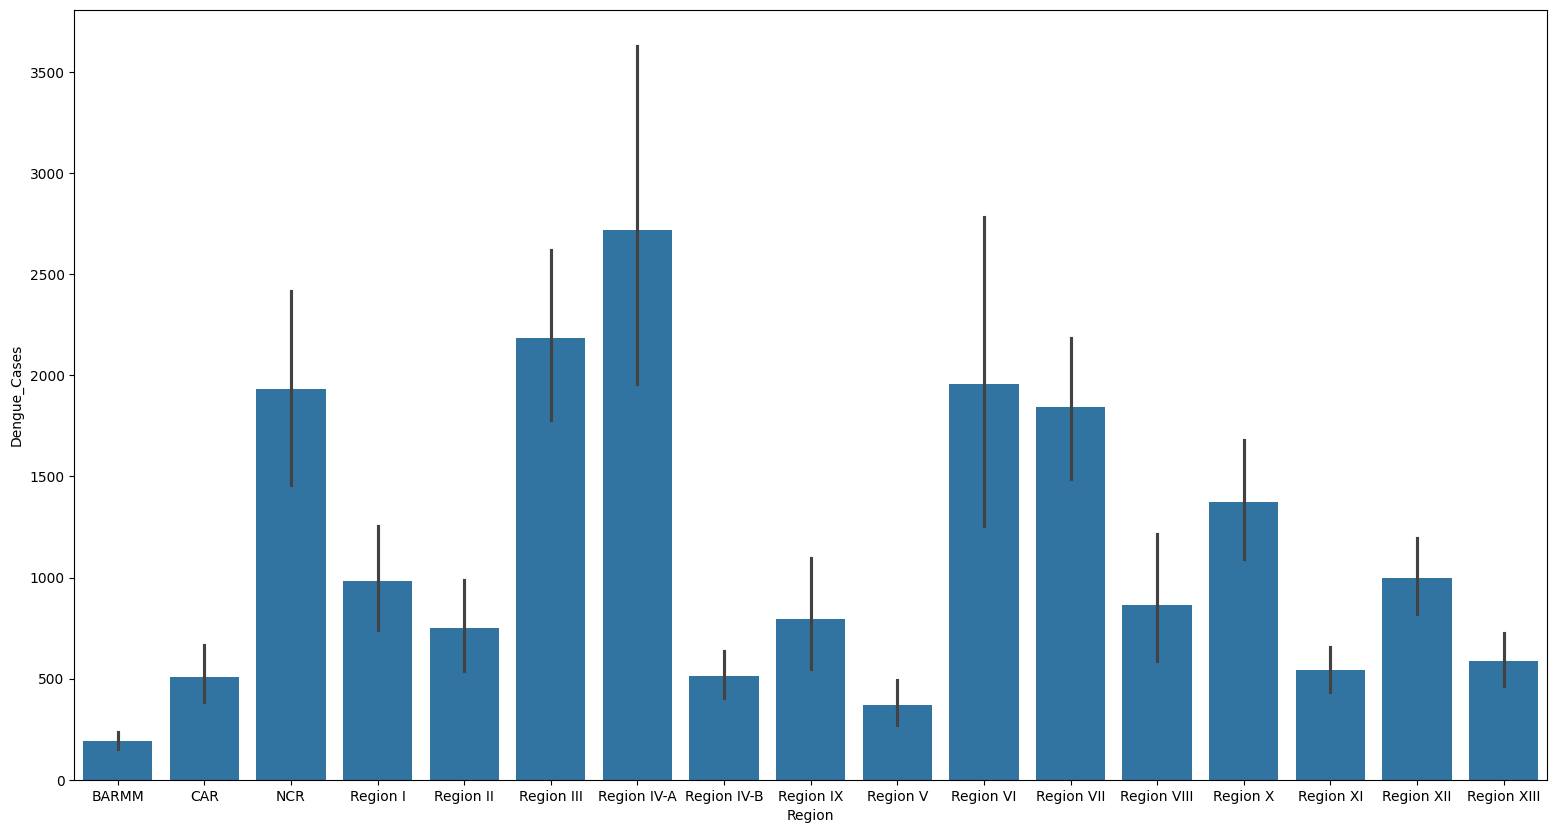

In [19]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

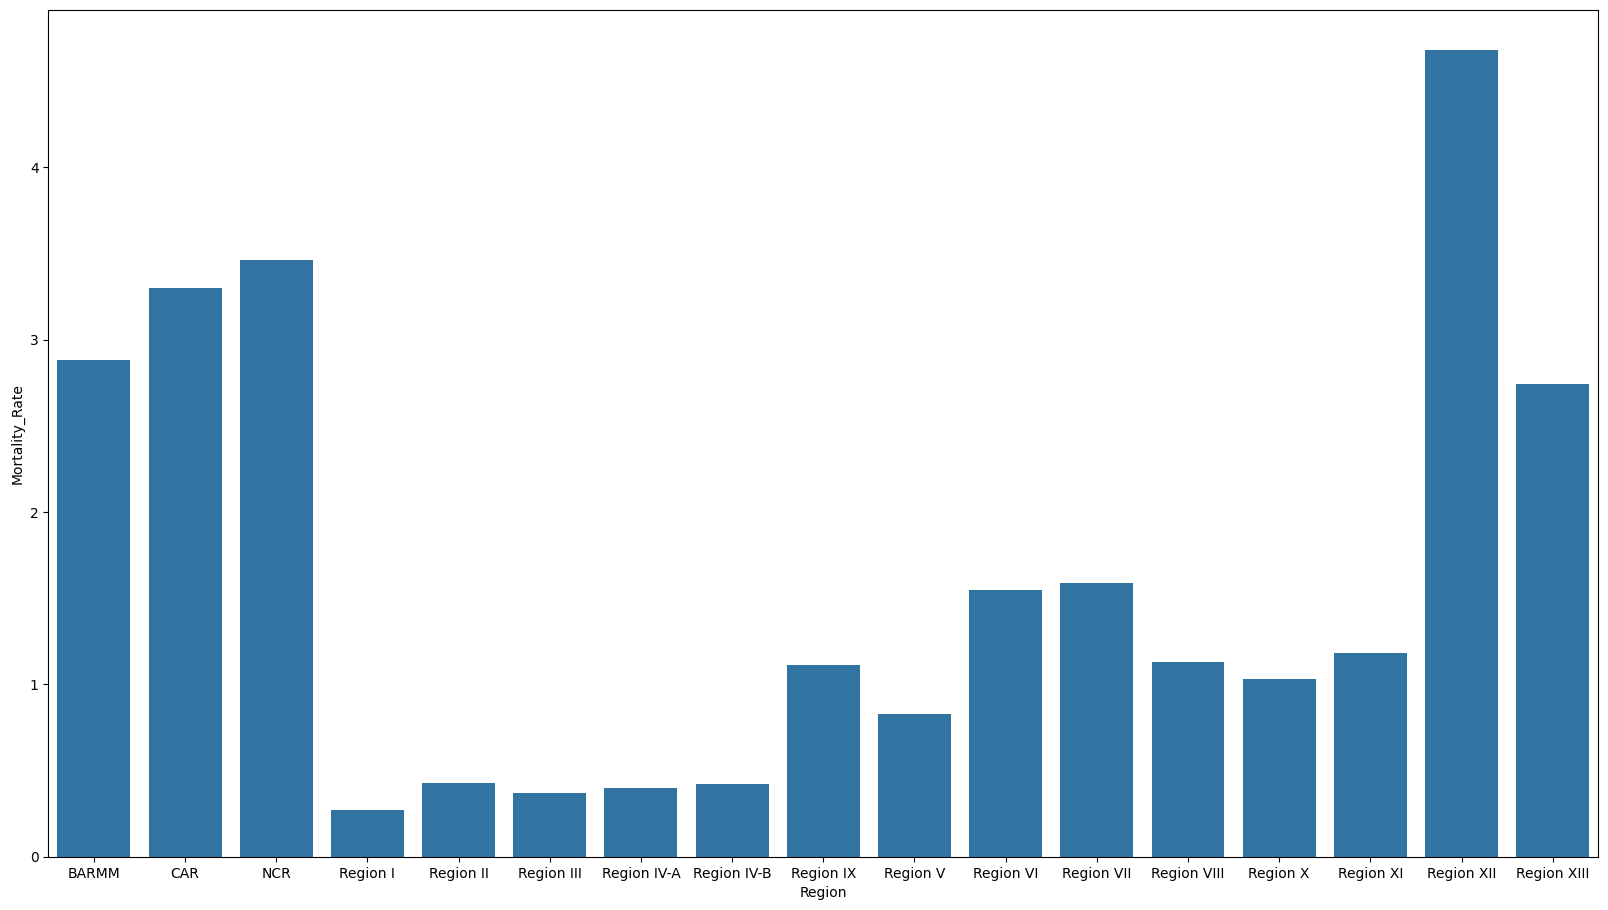

In [20]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

In [21]:
# Convert 'Year' column to datetime dtype
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')

# Group the data by region and year
reg_death_yr = dengue.groupby([dengue['Region'], dengue['Year'].dt.year])
# # # Calculate mortality rate
# reg_death_yr["Mortality_Rate"] = (reg_death_yr["Dengue_Deaths"] / reg_death_yr["Dengue_Cases"]) * 100

# # # Display the mortality rate per region and year
# print(reg_death_yr[["Dengue_Cases", "Dengue_Deaths", "Mortality_Rate"]])


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\3934910469.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reg_death_yr = dengue.groupby([dengue['Region'], dengue['Year'].dt.year])


In [22]:
dengue['Mortality_Rate'] = np.round(((dengue['Dengue_Deaths'] / dengue['Dengue_Cases'])* 100), 2)
dengue.isnull().sum()

Month             0
Year              0
Region            0
Dengue_Cases      0
Dengue_Deaths     0
Mortality_Rate    0
dtype: int64

C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\3986503283.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_per_region = dengue.groupby(["Region", "Year"])["Mortality_Rate"].sum().reset_index()


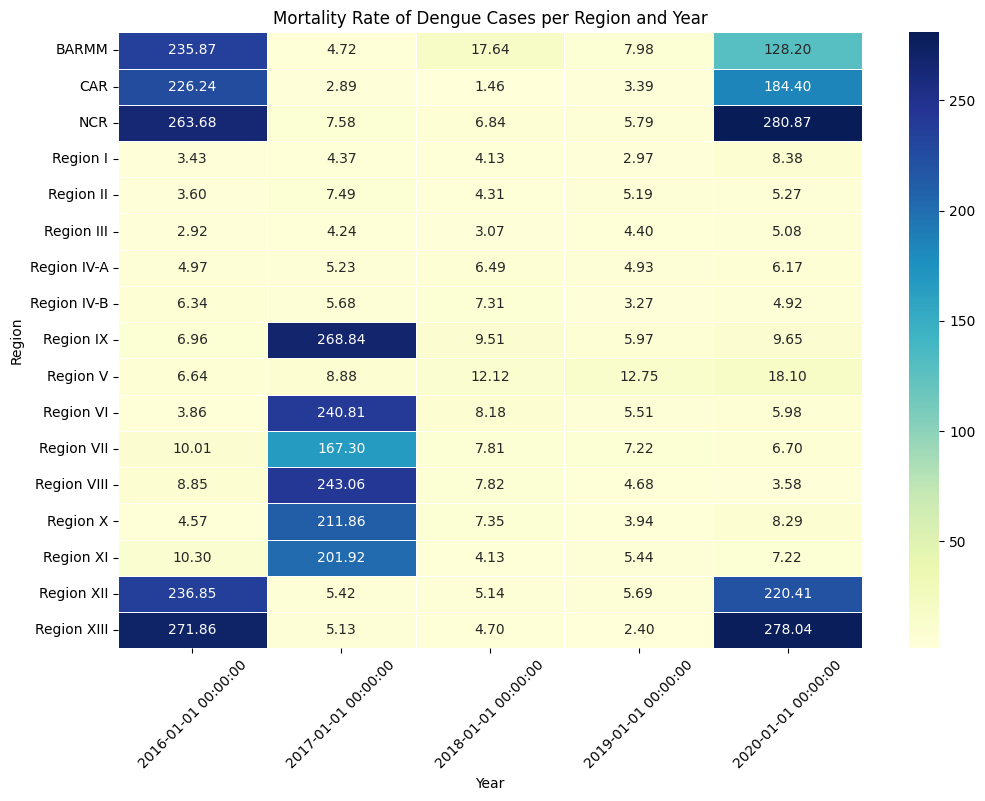

In [23]:
death_per_region = dengue.groupby(["Region", "Year"])["Mortality_Rate"].sum().reset_index()

death_per_region = death_per_region.pivot(index="Region", columns="Year", values="Mortality_Rate")
death_per_region = death_per_region.fillna(0)  # Replace NaN with 0
death_per_region = death_per_region.apply(pd.to_numeric, errors='coerce')

# # Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(death_per_region, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mortality Rate of Dengue Cases per Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.show()

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that year. </p>

C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\280831150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dengue.sort_values("Dengue_Cases", ascending=False), x="Region", y="Dengue_Cases", palette="coolwarm")


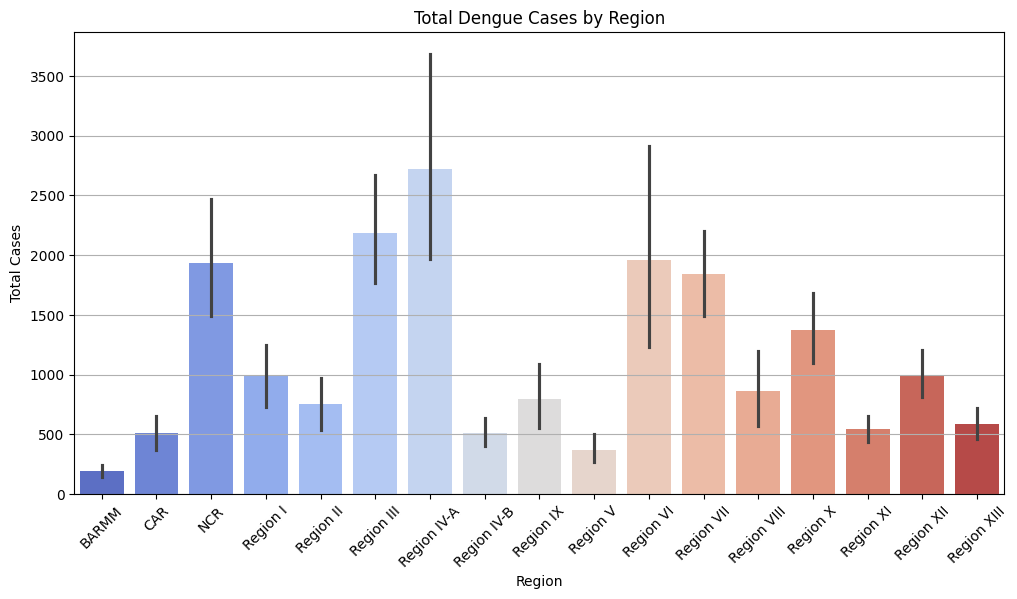

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dengue.sort_values("Dengue_Cases", ascending=False), x="Region", y="Dengue_Cases", palette="coolwarm")
plt.title("Total Dengue Cases by Region")
plt.xticks(rotation=45)
plt.ylabel("Total Cases")
plt.grid(axis="y")
plt.show()

<h1>Insight 1</h1>
<p>Certain regions may consistently have more cases due to population density or reporting practices.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\1290340809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dengue.sort_values("Dengue_Deaths", ascending=False), x="Region", y="Dengue_Deaths", palette="rocket")


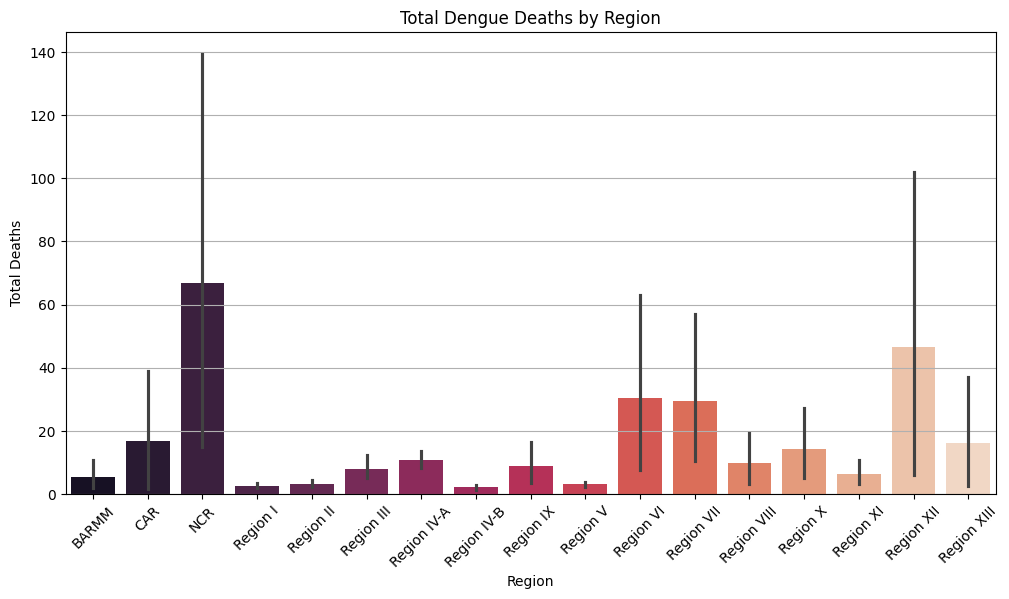

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dengue.sort_values("Dengue_Deaths", ascending=False), x="Region", y="Dengue_Deaths", palette="rocket")
plt.title("Total Dengue Deaths by Region")
plt.xticks(rotation=45)
plt.ylabel("Total Deaths")
plt.grid(axis="y")
plt.show()

<h1>Insight 2</h1>
<p>While some regions have more cases, others may show disproportionately high deaths — potentially indicating healthcare or response disparities.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\3533521495.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = dengue.groupby(["Year", "Month"])["Dengue_Cases"].sum().unstack()


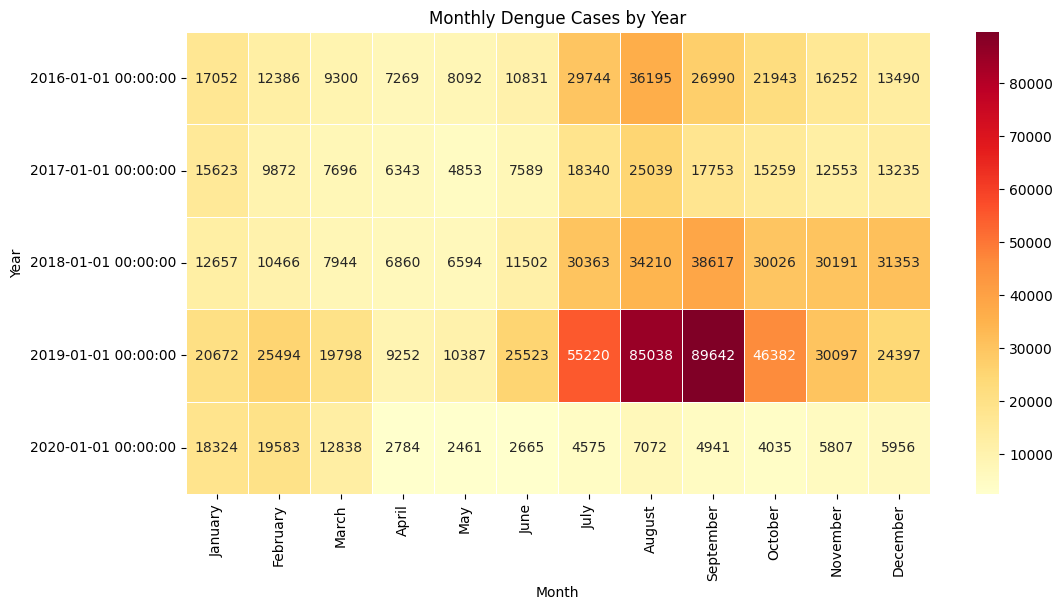

In [26]:
heatmap_data = dengue.groupby(["Year", "Month"])["Dengue_Cases"].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Monthly Dengue Cases by Year")
plt.ylabel("Year")
plt.show()

<h1>Insight 3</h1>
<p>Heatmaps visually display seasonal outbreaks and emphasize years with more intense peaks.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\2897053171.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top5 = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False).head(5)


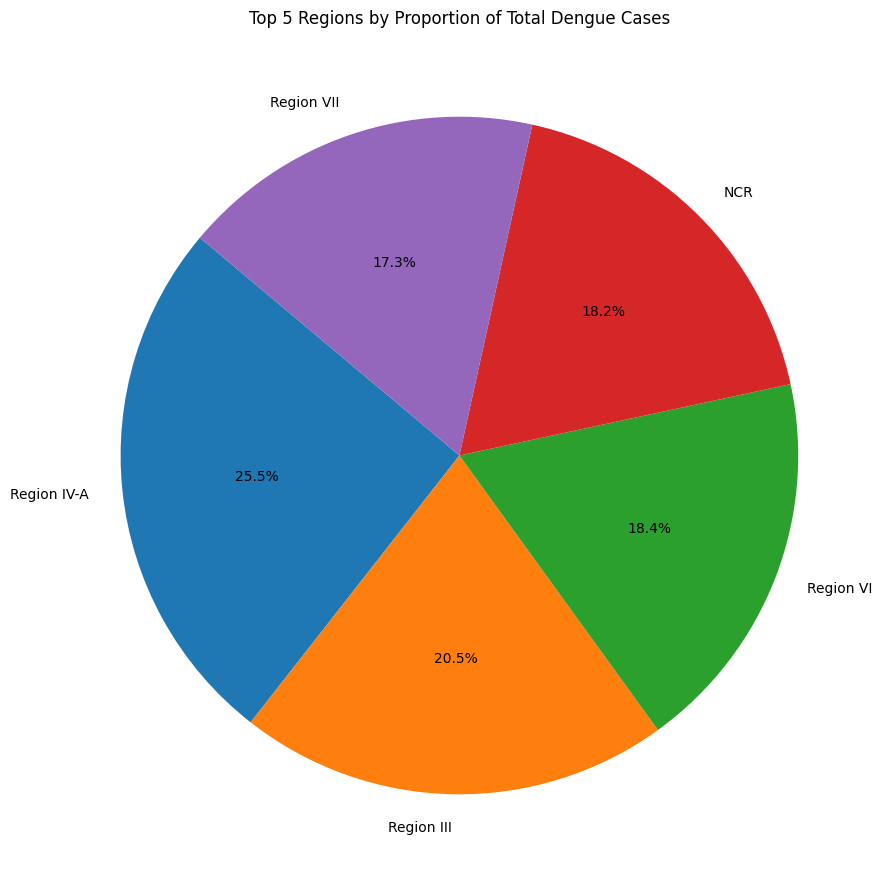

In [27]:
plt.gcf().set_size_inches(20,11)
top5 = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False).head(5)
top5.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Regions by Proportion of Total Dengue Cases")
plt.ylabel("")
plt.show()

<h1>Insight 4</h1>
<p>More than half of all dengue cases are found in just five regions, mostly in NCR and Region IV-A.</p>


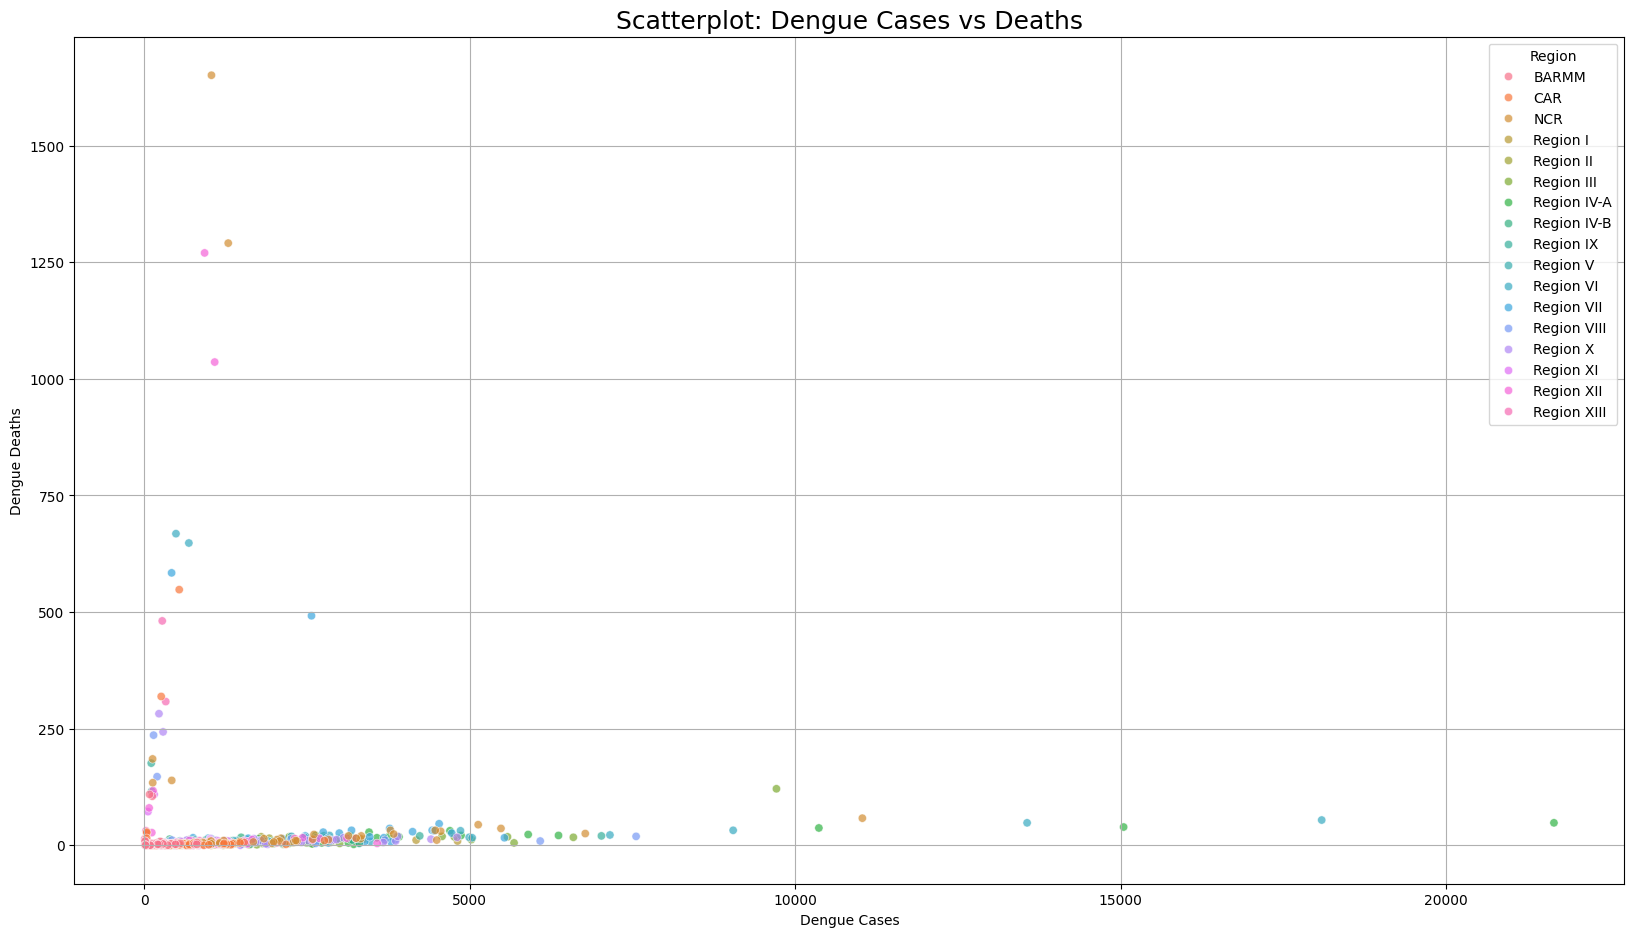

In [28]:
plt.gcf().set_size_inches(20,11)
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths", hue="Region", alpha=0.7)
plt.title("Scatterplot: Dengue Cases vs Deaths", fontsize=18)
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.grid(True)
plt.show()

<h1>Insight 5</h1>
<p>More cases usually mean more deaths, but some areas don’t follow this pattern.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\1288637656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dengue, x="Region", y="Dengue_Cases", palette="Set2")


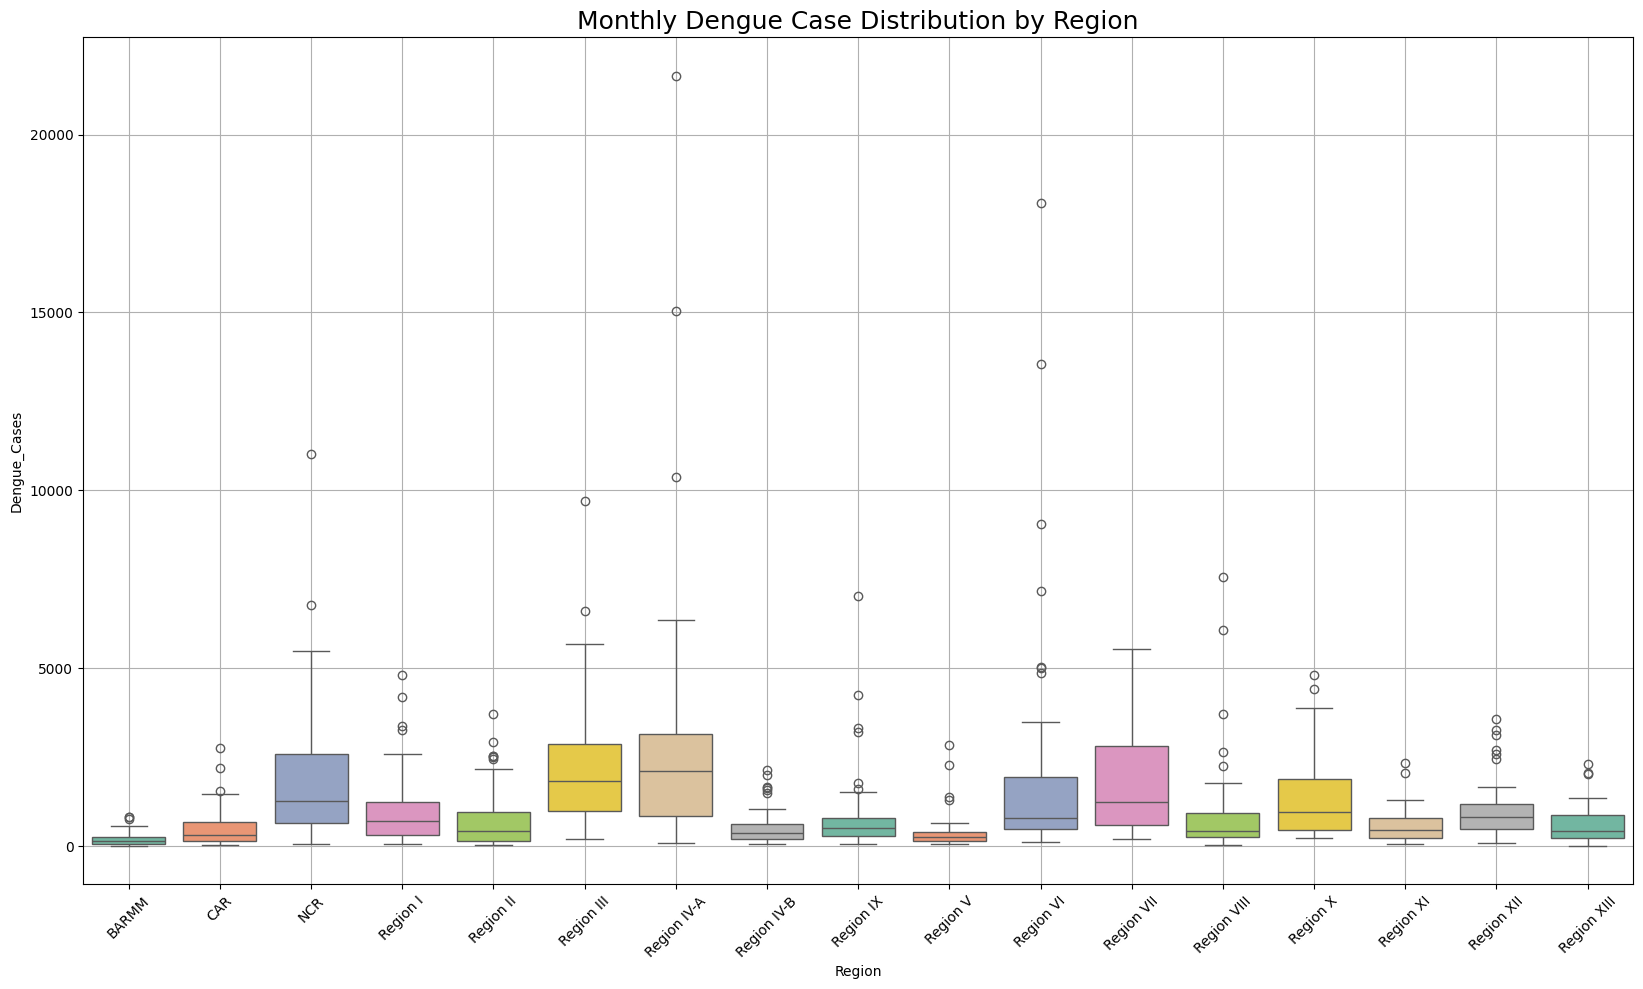

In [29]:
plt.gcf().set_size_inches(20,11)
sns.boxplot(data=dengue, x="Region", y="Dengue_Cases", palette="Set2")
plt.title("Monthly Dengue Case Distribution by Region", fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<h1>Insight 6</h1>
<p>This boxplot highlights the regional distribution of monthly dengue cases. Urban and highly populated regions such as NCR, Region III, and IV-A have the highest and most variable monthly cases.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\3305427041.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sum = dengue.groupby("Month")["Dengue_Cases"].sum().reset_index()
C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\3305427041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sum, x="Month", y="Dengue_Cases", palette="coolwarm")


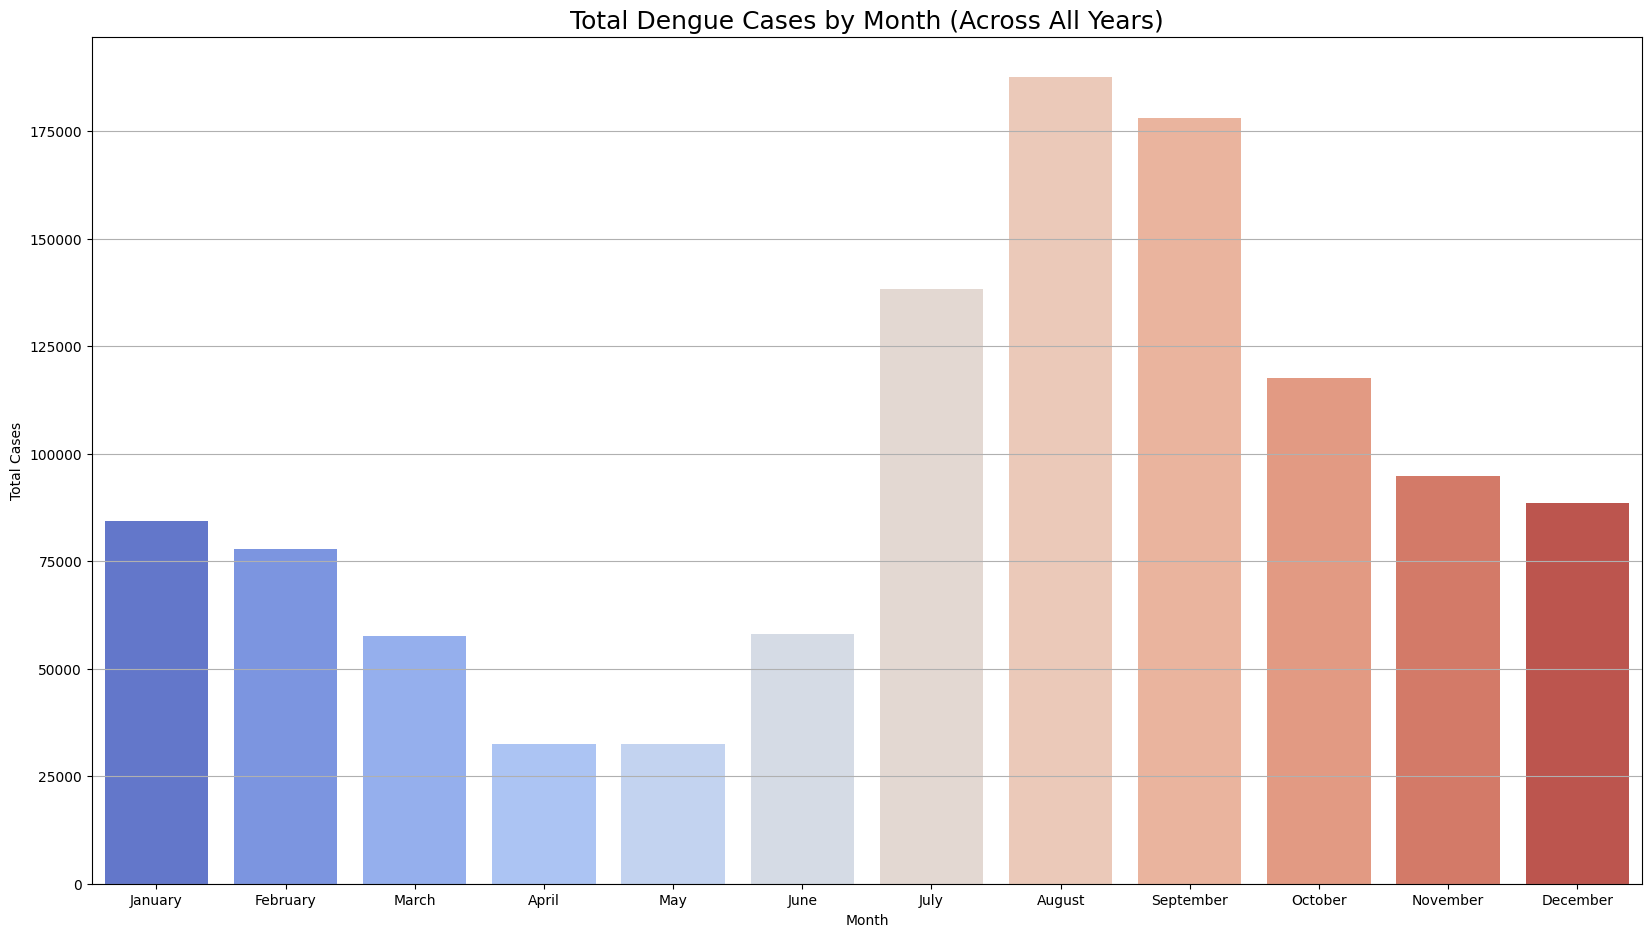

In [30]:
plt.gcf().set_size_inches(20,11)
monthly_sum = dengue.groupby("Month")["Dengue_Cases"].sum().reset_index()
sns.barplot(data=monthly_sum, x="Month", y="Dengue_Cases", palette="coolwarm")
plt.title("Total Dengue Cases by Month (Across All Years)", fontsize=18)
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.grid(axis='y')
plt.show()

<h1>Insight 7</h1>
<p>Dengue cases are highest from July to September, aligning with the rainy season in the Philippines.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\2114661603.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deaths_by_year = dengue.groupby("Year")["Dengue_Deaths"].sum()


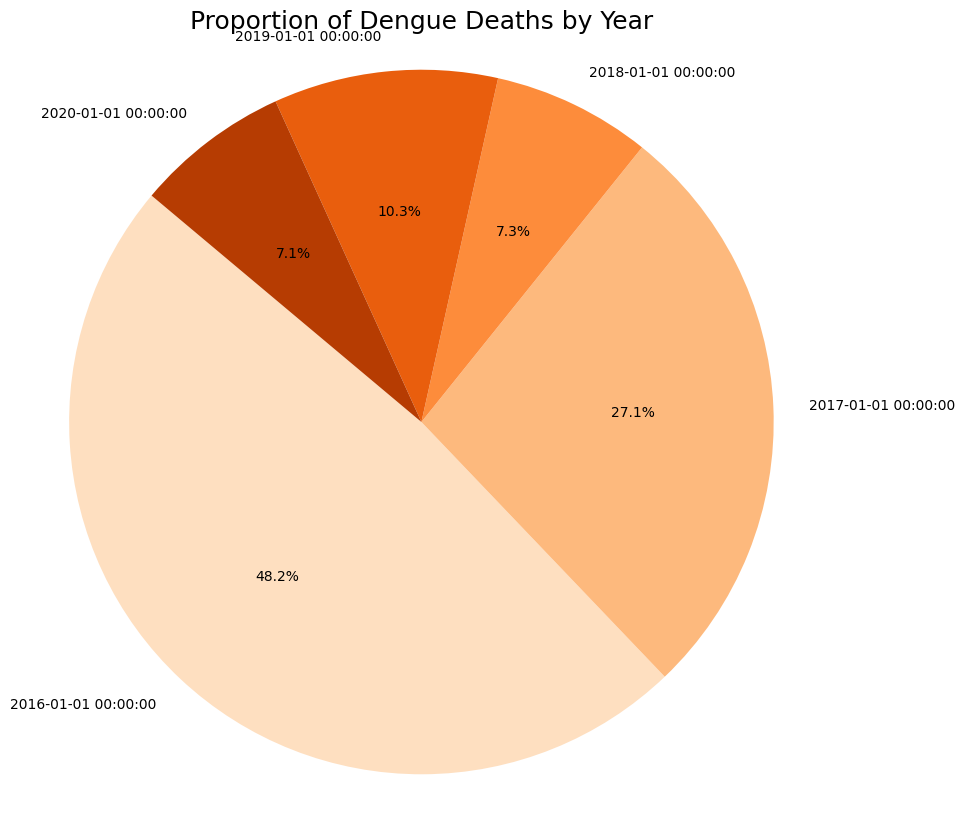

In [31]:
# Total dengue deaths per year
deaths_by_year = dengue.groupby("Year")["Dengue_Deaths"].sum()

# Pie plot
plt.figure(figsize=(10, 10))
plt.pie(deaths_by_year, labels=deaths_by_year.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Oranges", len(deaths_by_year)))
plt.title("Proportion of Dengue Deaths by Year", fontsize=18)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<h1>Insight 8</h1>
<p>Nearly half of the total dengue deaths occurred in 2016, highlighting it as the deadliest year in the dataset.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\4227960363.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  dengue_pivot = dengue.pivot_table(values="Dengue_Cases", index="Year", columns="Month", aggfunc="sum")


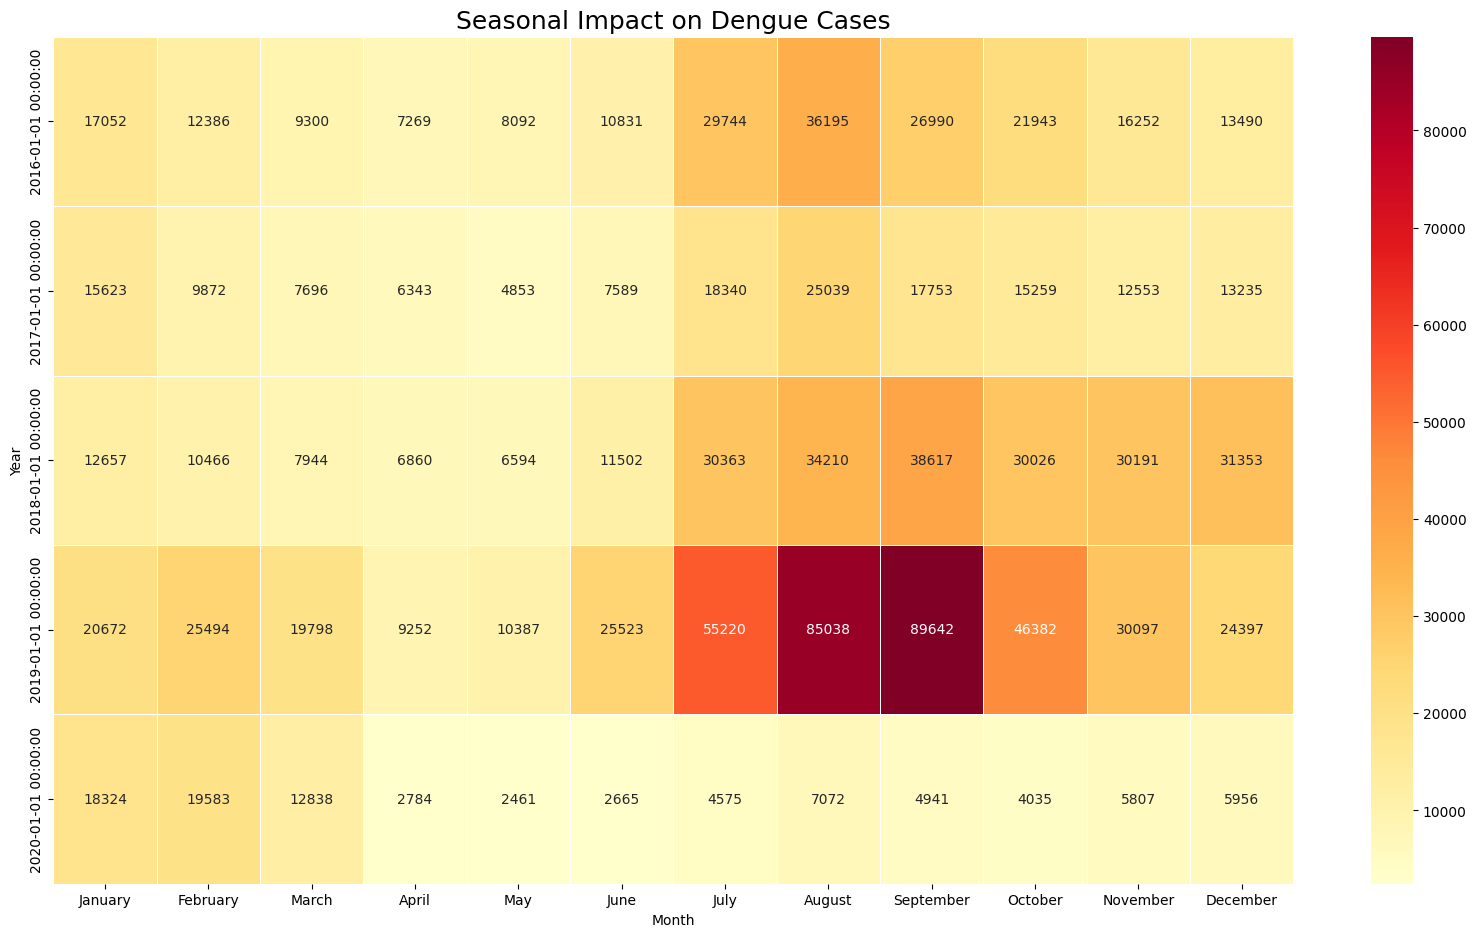

In [32]:
dengue_pivot = dengue.pivot_table(values="Dengue_Cases", index="Year", columns="Month", aggfunc="sum")
plt.gcf().set_size_inches(20,11)
sns.heatmap(dengue_pivot, cmap="YlOrRd", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Seasonal Impact on Dengue Cases", fontsize=18)
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

<h1>Insight 9</h1>
<p>Mid-year months, especially July to September, consistently show higher dengue cases across all years.</p>


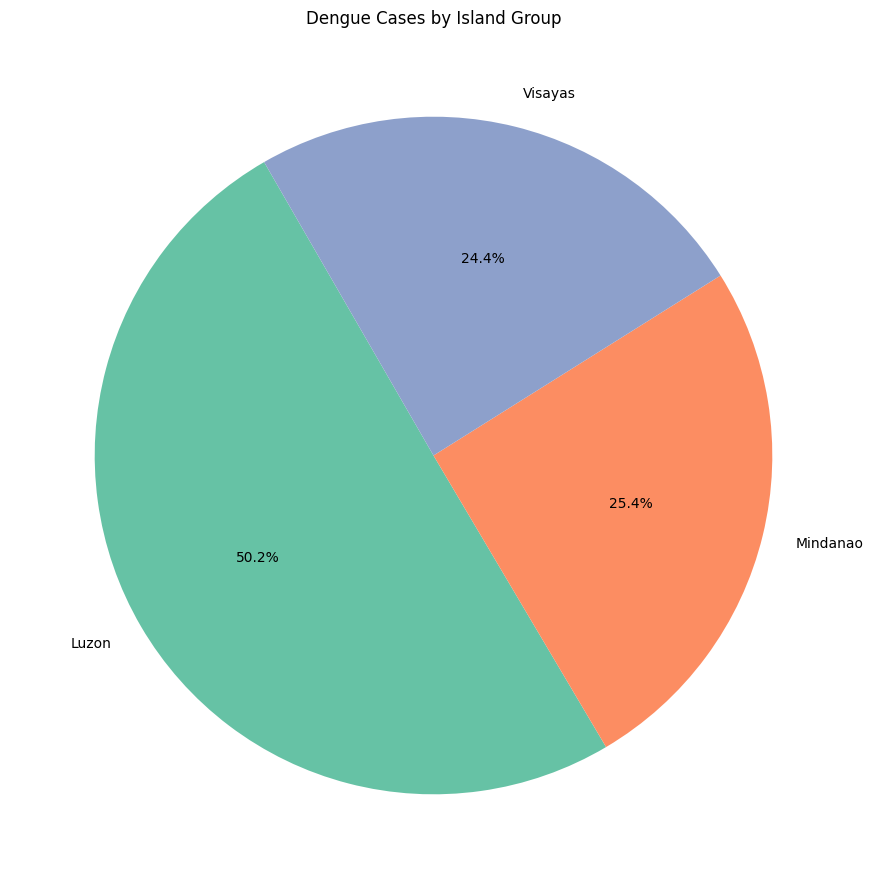

In [33]:
plt.gcf().set_size_inches(20,11)
island_group = {
    "Luzon": ["NCR", "Region I", "Region II", "Region III", "Region IV-A", "Region IV-B", "CAR"],
    "Visayas": ["Region VI", "Region VII", "Region VIII"],
    "Mindanao": ["Region IX", "Region X", "Region XI", "Region XII", "CARAGA", "BARMM"]
}

dengue["Island_Group"] = dengue["Region"].map(
    lambda r: "Luzon" if r in island_group["Luzon"] else "Visayas" if r in island_group["Visayas"] else "Mindanao"
)

group_cases = dengue.groupby("Island_Group")["Dengue_Cases"].sum()
colors = sns.color_palette("Set2")
group_cases.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=120)
plt.title("Dengue Cases by Island Group")
plt.ylabel("")
plt.show()

<h1>Insight 10</h1>
<p>Luzon dominates in reported dengue cases, likely due to high urban density and population..</p>


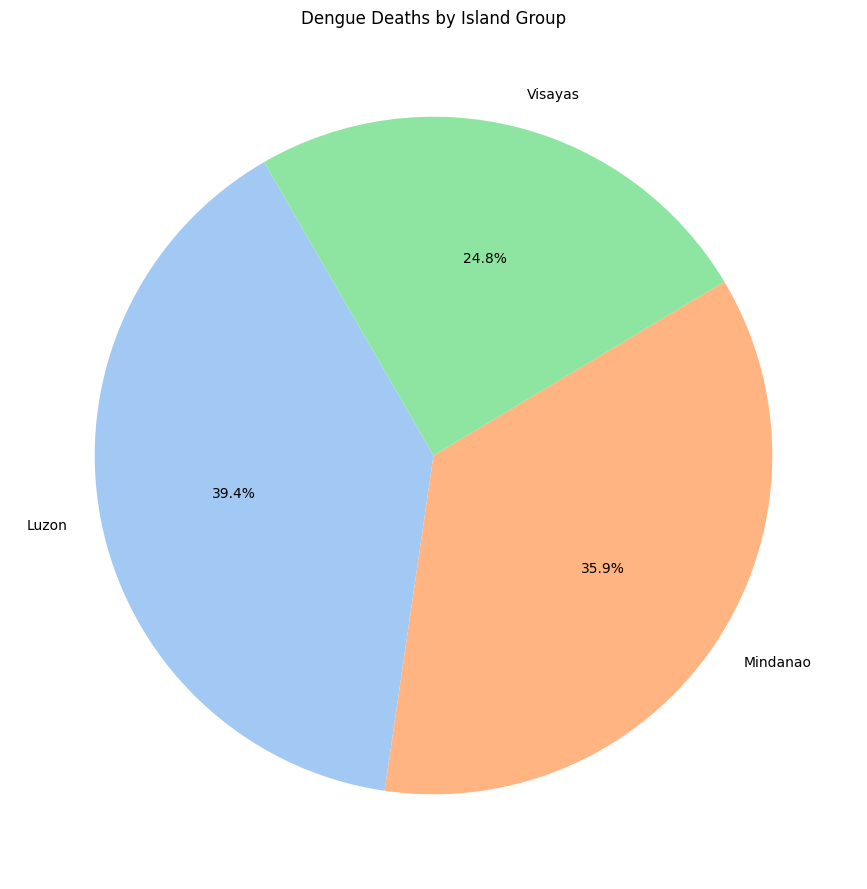

In [34]:
plt.gcf().set_size_inches(20,11)
group_deaths = dengue.groupby("Island_Group")["Dengue_Deaths"].sum()
colors = sns.color_palette("pastel")
group_deaths.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=120)
plt.title("Dengue Deaths by Island Group")
plt.ylabel("")
plt.show()


<h1>Insight 11</h1>
<p>Even though Luzon has the most cases, Mindanao has a proportionally higher share of deaths.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\3425842066.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_months = dengue.groupby("Month")["Dengue_Cases"].sum().sort_values(ascending=False).head(5)


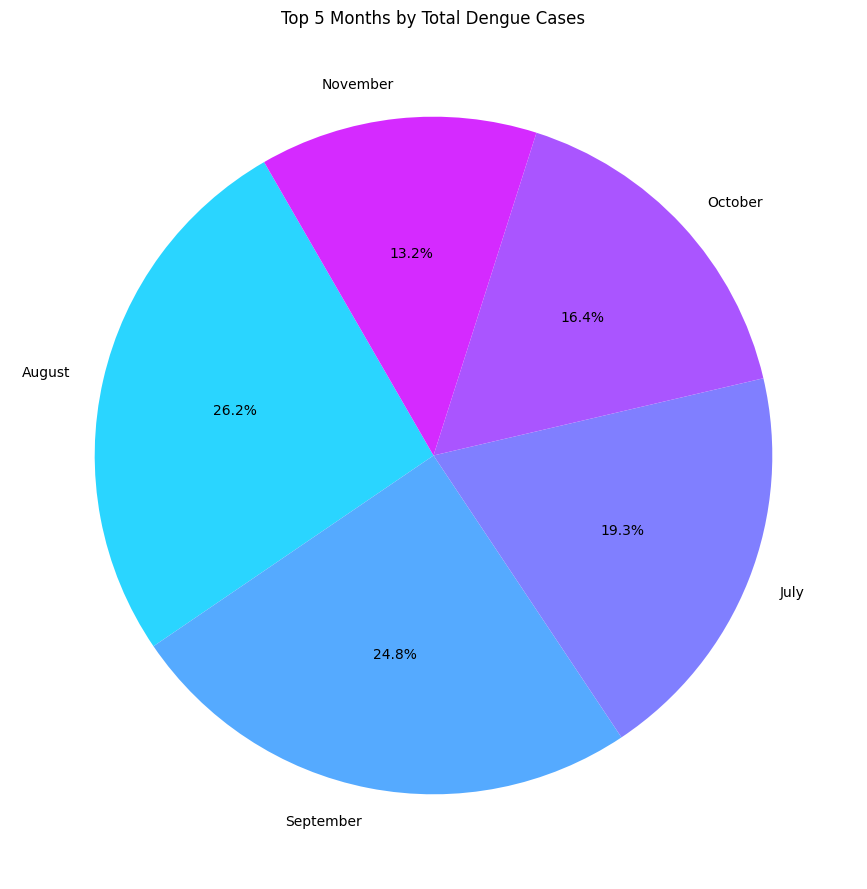

In [35]:
plt.gcf().set_size_inches(20,11)
top_months = dengue.groupby("Month")["Dengue_Cases"].sum().sort_values(ascending=False).head(5)
colors = sns.color_palette("cool", len(top_months))
top_months.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=120)
plt.title("Top 5 Months by Total Dengue Cases")
plt.ylabel("")
plt.show()

<h1>Insight 12</h1>
<p>Rainy season months dominate dengue cases, consistent with mosquito breeding cycles.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\3300959415.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cases = dengue.groupby("Region")["Dengue_Deaths"].mean().sort_values(ascending=False).head(5)


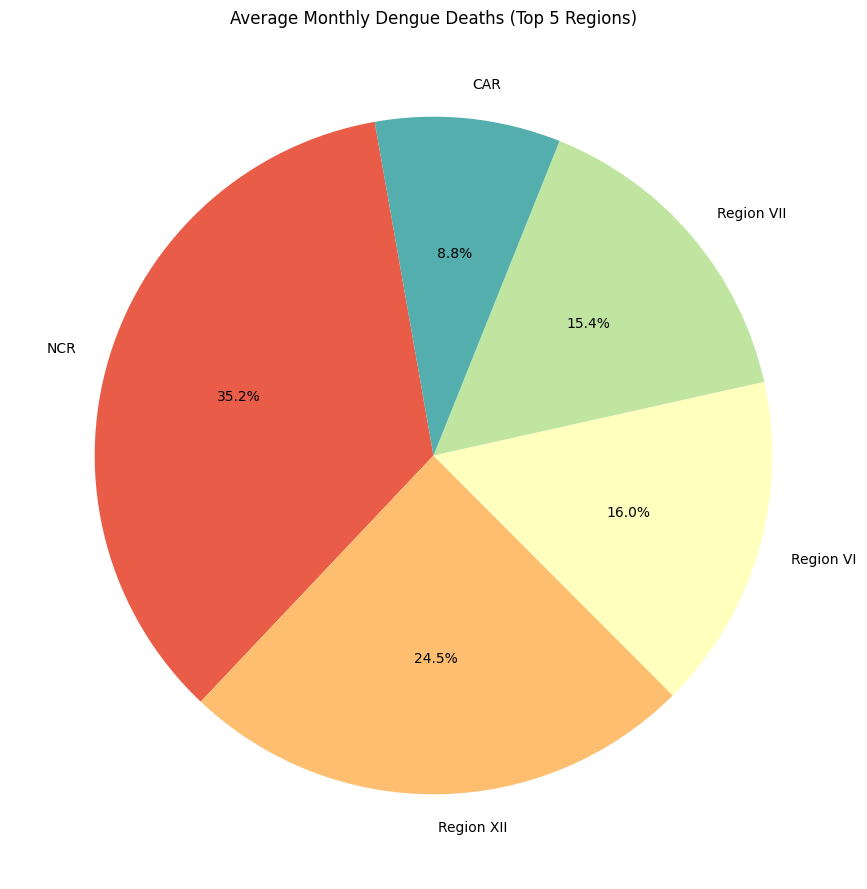

In [36]:
plt.gcf().set_size_inches(20,11)
avg_cases = dengue.groupby("Region")["Dengue_Deaths"].mean().sort_values(ascending=False).head(5)
colors = sns.color_palette("Spectral", len(avg_cases))
avg_cases.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=100)
plt.title("Average Monthly Dengue Deaths (Top 5 Regions)")
plt.ylabel("")
plt.show()



<h1>Insight 13</h1>
<p>NCR and nearby regions report the highest average monthly dengue deaths, indicating consistent outbreaks</p>


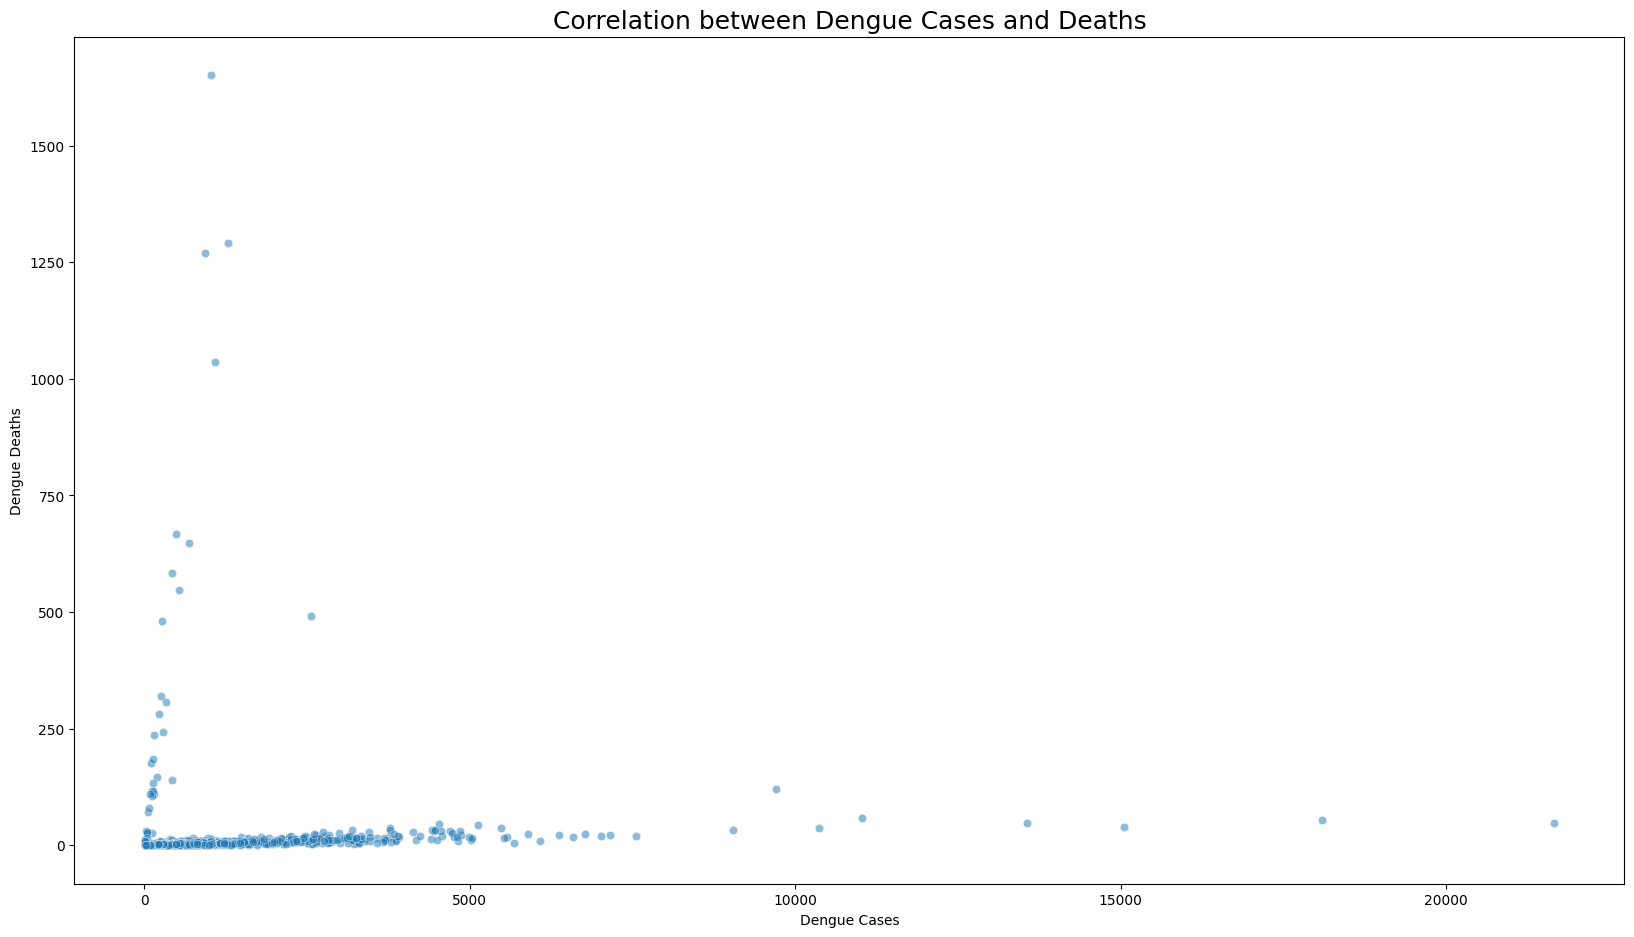

In [37]:
plt.gcf().set_size_inches(20,11)
sns.scatterplot(x=dengue["Dengue_Cases"], y=dengue["Dengue_Deaths"], alpha=0.5)
plt.title("Correlation between Dengue Cases and Deaths", fontsize=18)
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()

<h1>Insight 14</h1>
<p>More dengue cases usually mean more deaths, but not every outbreak leads to higher fatality numbers.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\805041530.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=dengue, x="Region", y="Dengue_Cases", hue="Island_Group", palette="Set2", inner="box", scale="width", split=False)


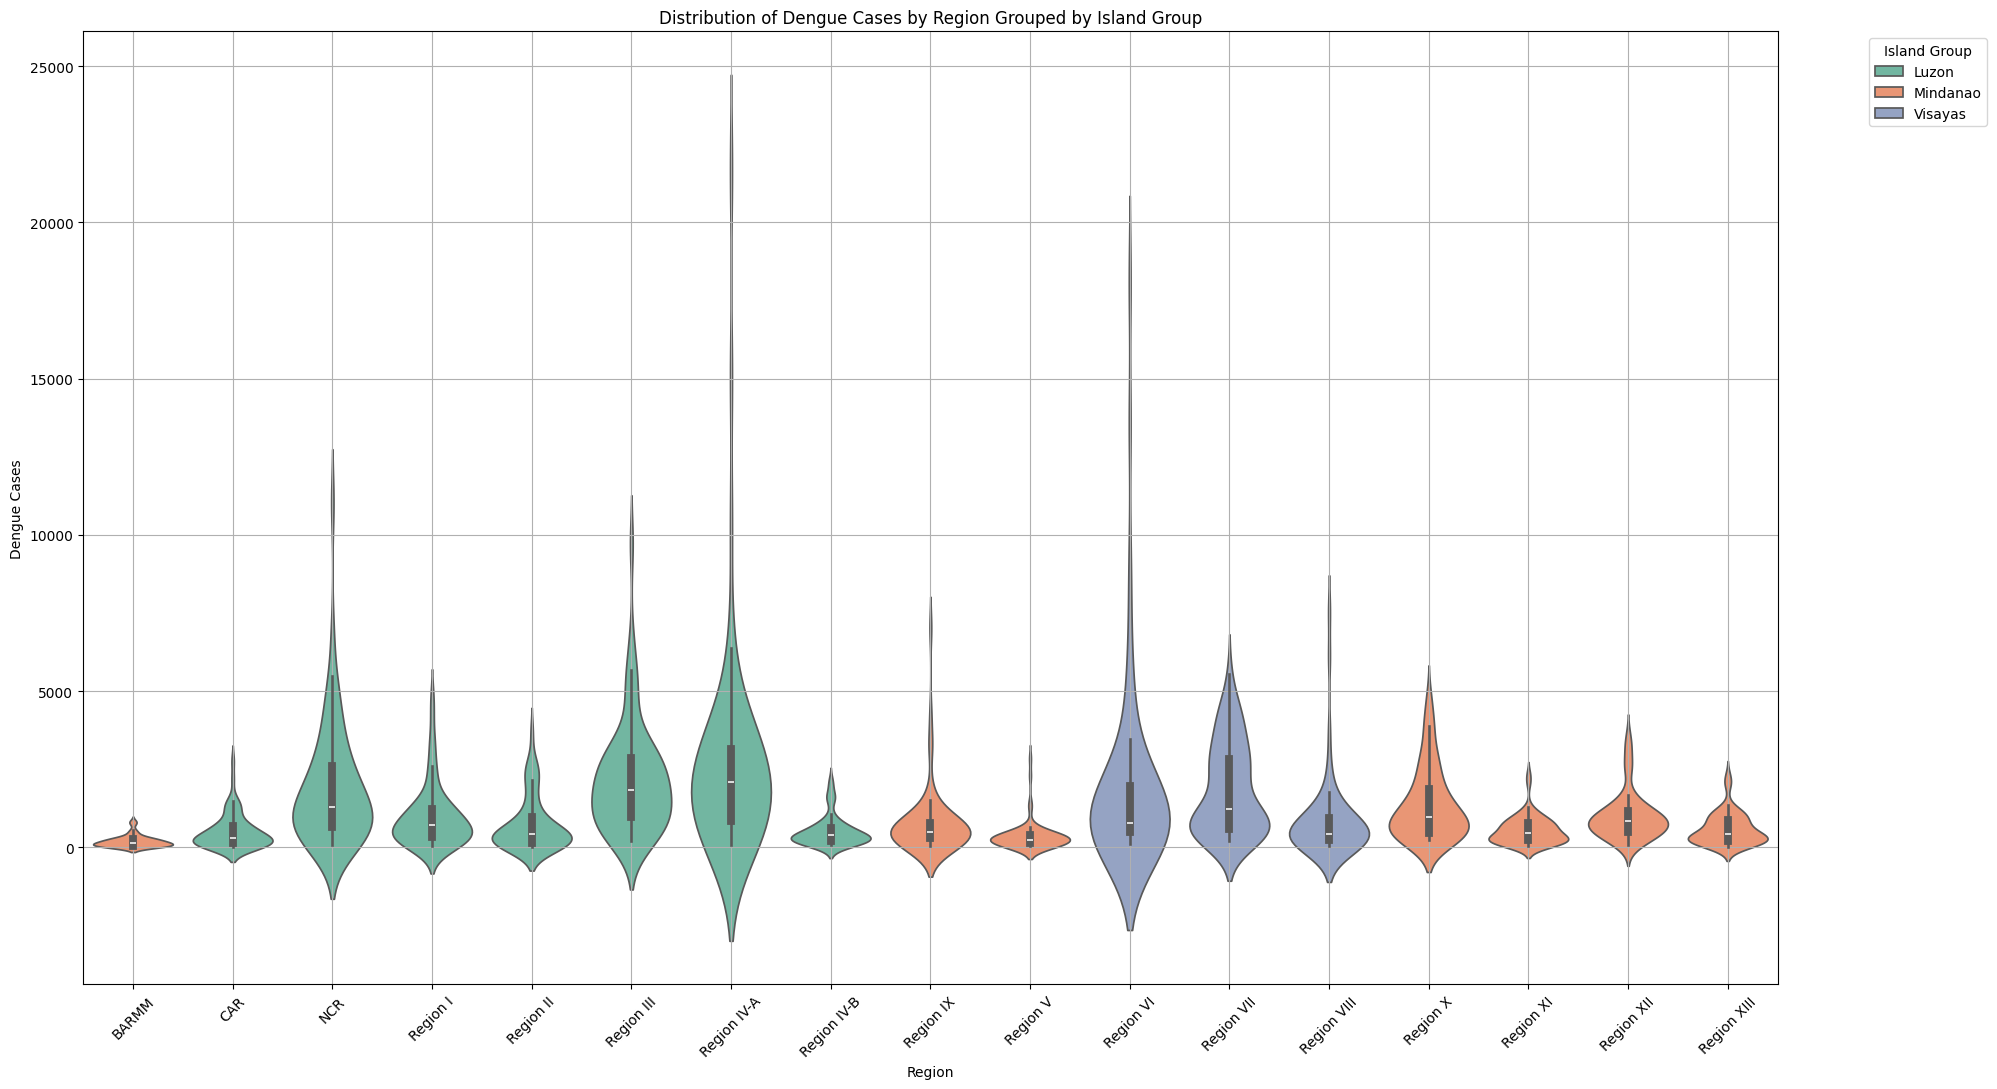

In [38]:
plt.gcf().set_size_inches(20,11)
sns.violinplot(data=dengue, x="Region", y="Dengue_Cases", hue="Island_Group", palette="Set2", inner="box", scale="width", split=False)
plt.title("Distribution of Dengue Cases by Region Grouped by Island Group")
plt.xticks(rotation=45)
plt.ylabel("Dengue Cases")
plt.xlabel("Region")
plt.legend(title="Island Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Insight 15</h1>
<p>Regions from Luzon generally report a wider and higher distribution of dengue cases, while Mindanao and Visayas have more compact distributions with fewer extreme values.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\3359445540.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=dengue, x="Island_Group", y="Dengue_Cases", hue="Year", palette="tab20", inner="box", scale="width", split=False)


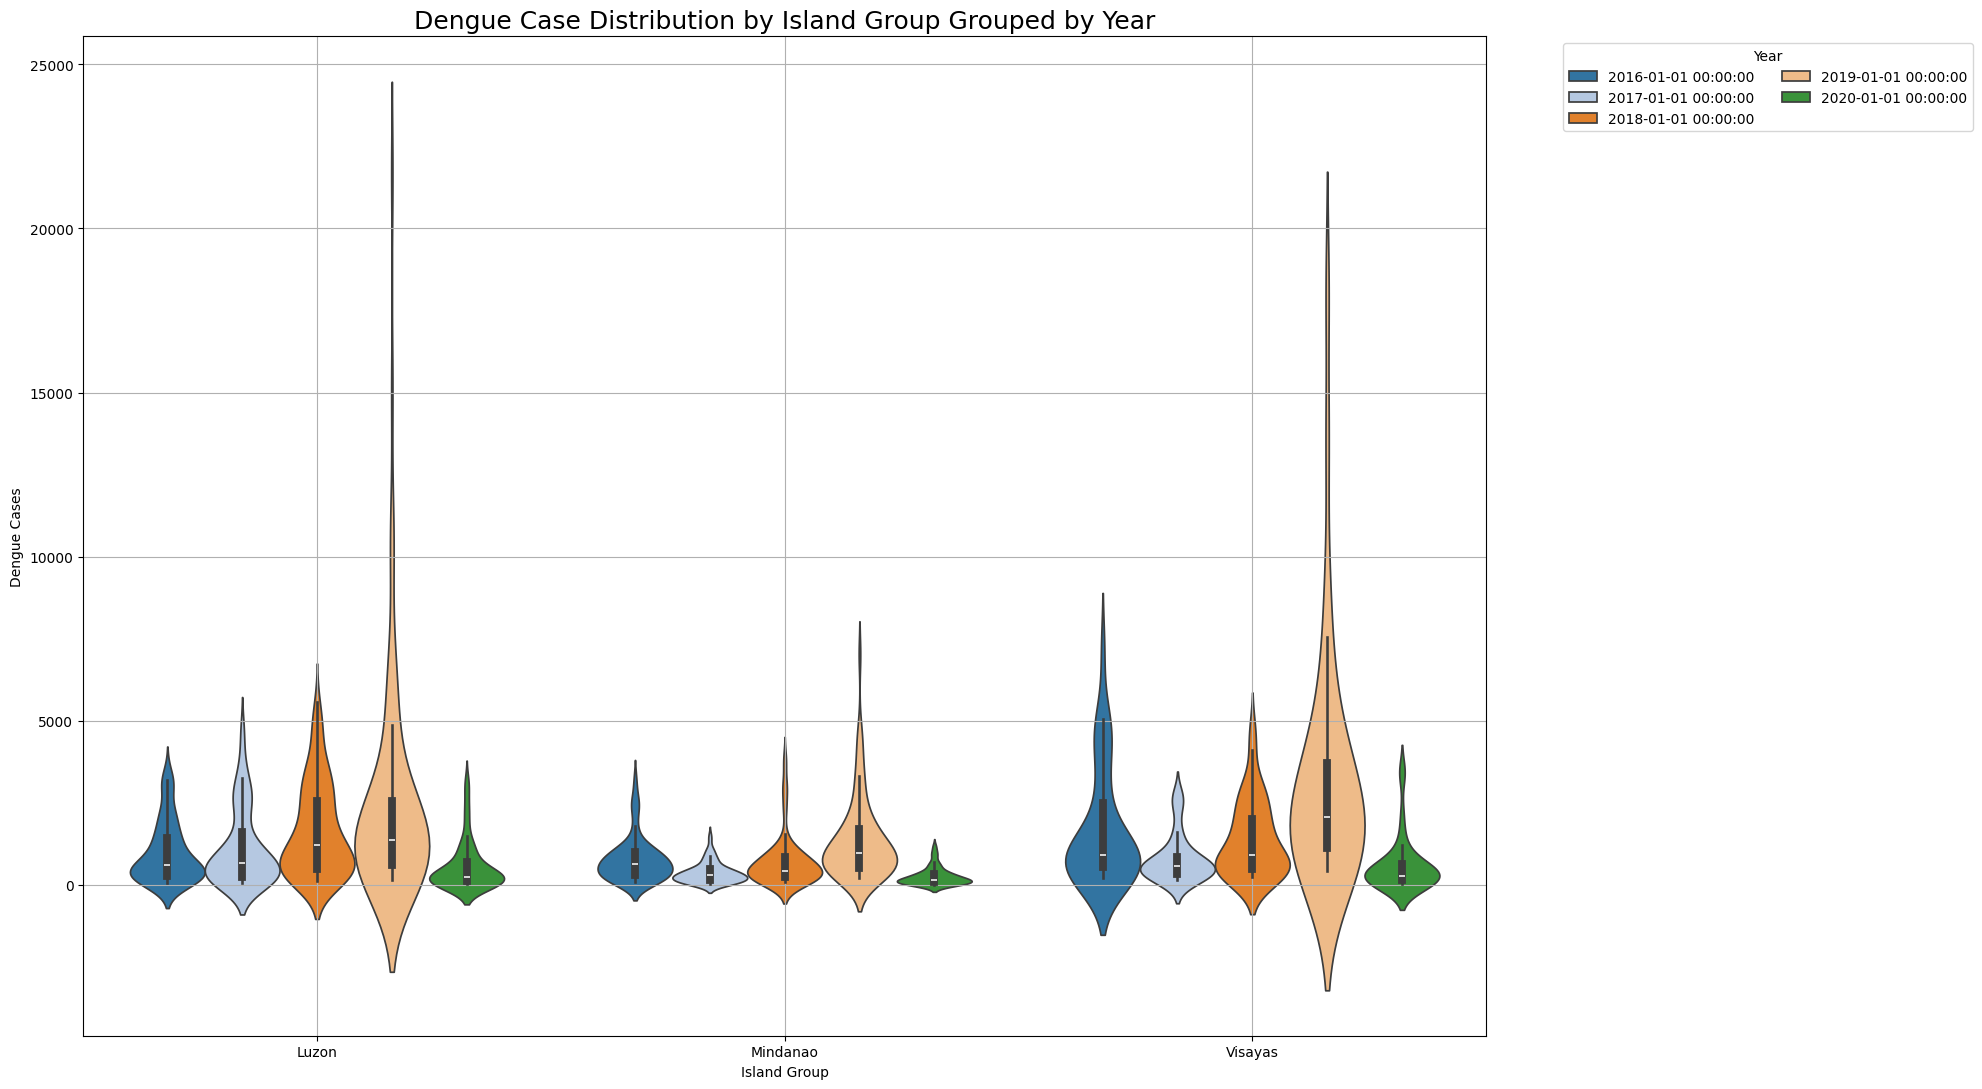

In [39]:
plt.gcf().set_size_inches(20,11)
sns.violinplot(data=dengue, x="Island_Group", y="Dengue_Cases", hue="Year", palette="tab20", inner="box", scale="width", split=False)
plt.title("Dengue Case Distribution by Island Group Grouped by Year", fontsize=18)
plt.ylabel("Dengue Cases")
plt.xlabel("Island Group")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Insight 16</h1>
<p>Luzon consistently shows higher and more variable dengue cases across the years compared to Visayas and Mindanao.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\3643940661.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dengue.groupby("Year")["Dengue_Cases"].sum().plot(marker="o", linestyle='-')


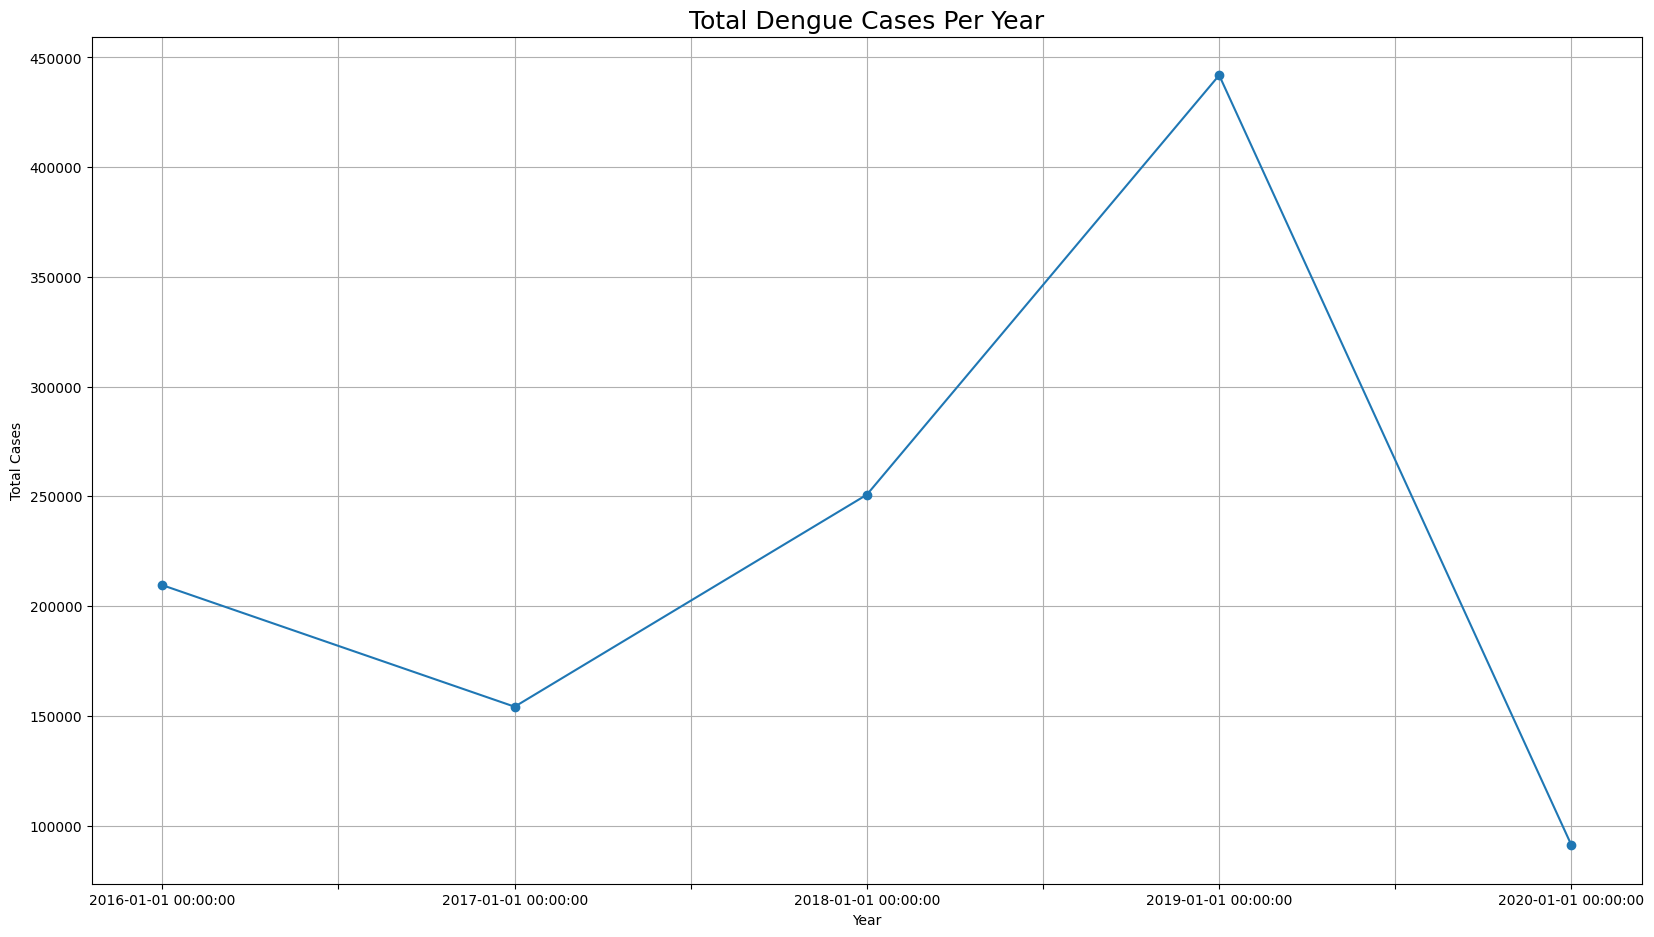

In [40]:
plt.gcf().set_size_inches(20,11)
dengue.groupby("Year")["Dengue_Cases"].sum().plot(marker="o", linestyle='-')
plt.title("Total Dengue Cases Per Year", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.grid(True)
plt.show()

<h1>Insight 17</h1>
<p>2019 stands out across almost all regions, with the NCR and Region IV-A showing extreme case counts.</p>


C:\Users\zorri\AppData\Local\Temp\ipykernel_12716\3210060705.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cases_heatmap = dengue.pivot_table(values="Dengue_Cases", index="Region", columns="Year", aggfunc="sum")


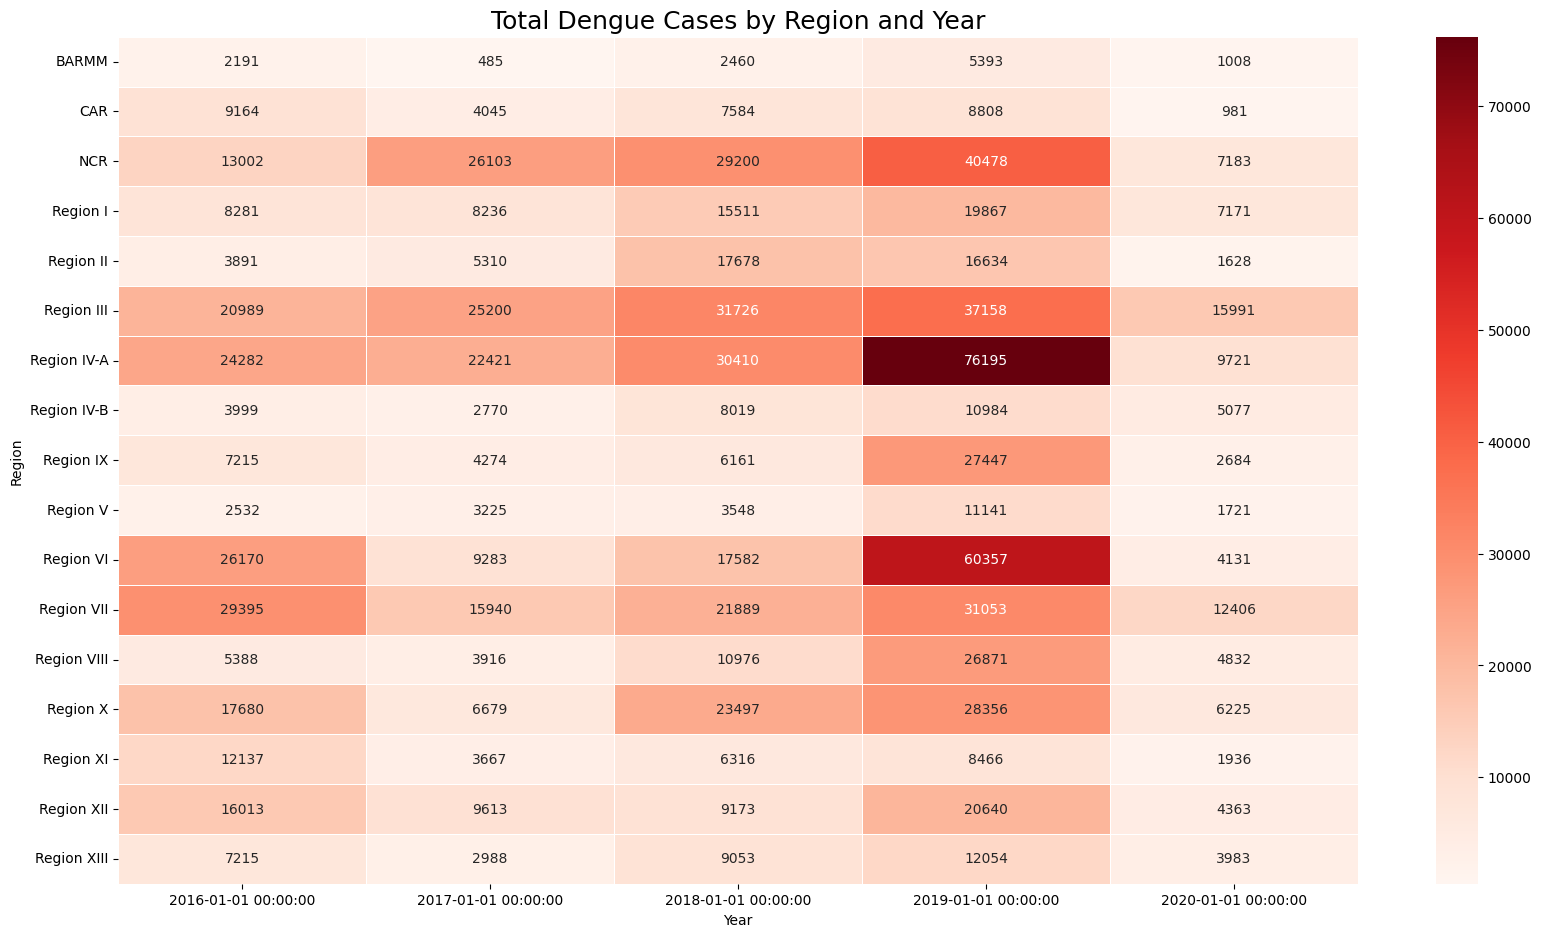

In [41]:
cases_heatmap = dengue.pivot_table(values="Dengue_Cases", index="Region", columns="Year", aggfunc="sum")
plt.gcf().set_size_inches(20,11)
sns.heatmap(cases_heatmap, cmap="Reds", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Total Dengue Cases by Region and Year", fontsize=18)
plt.show()


<h1>Insight 18</h1>
<p>Region IV-A, NCR, and Region III consistently recorded the highest dengue cases, with 2019 showing the most intense activity across multiple regions.</p>


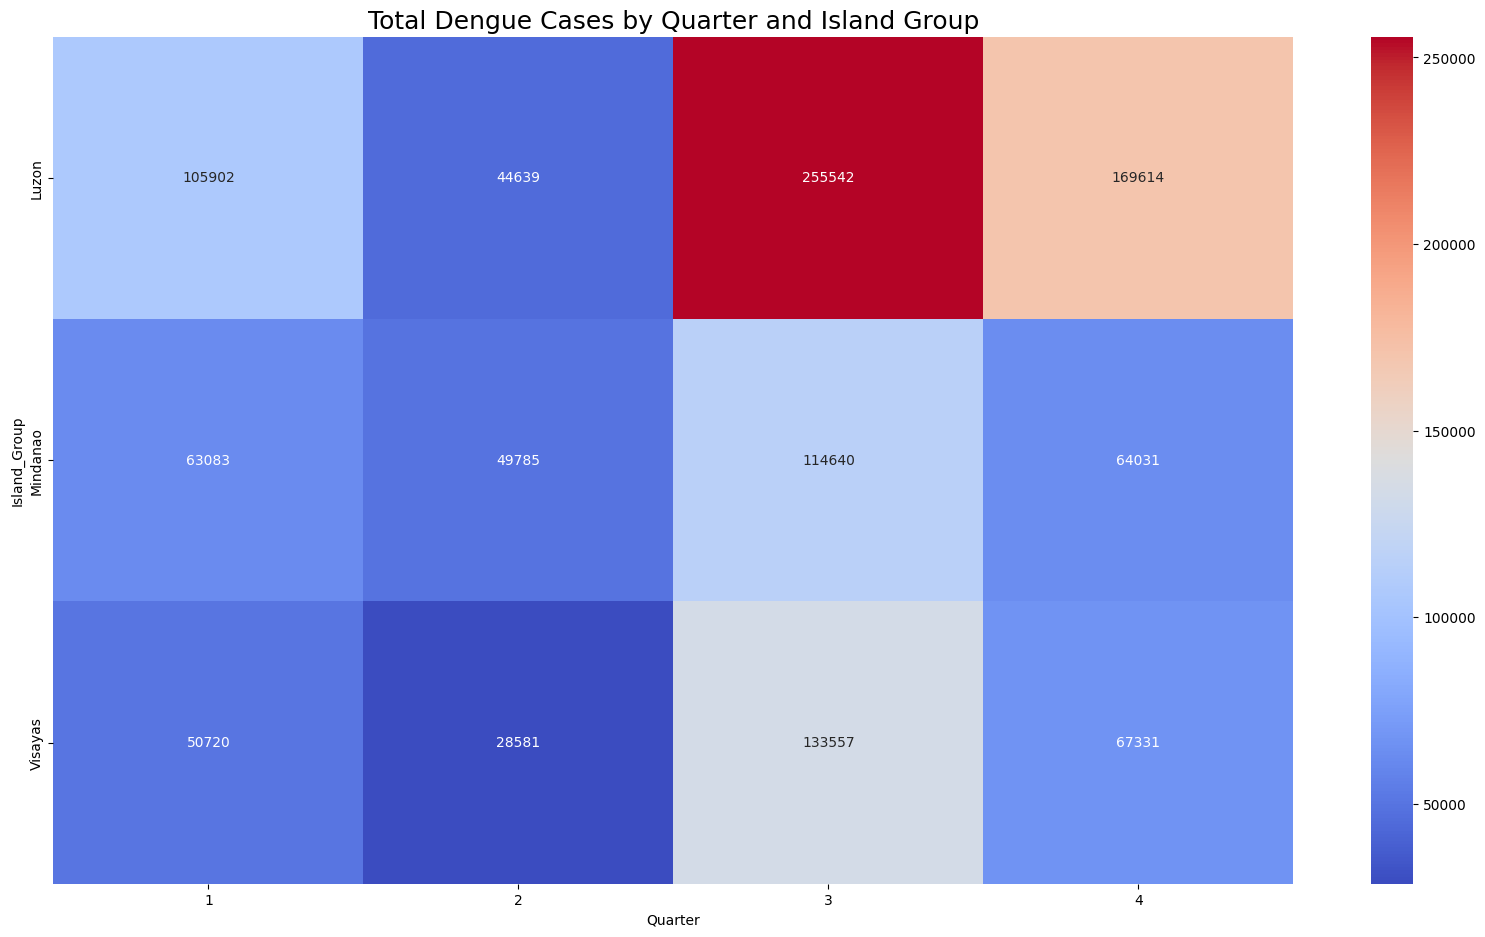

In [42]:
dengue["Quarter"] = pd.to_datetime(dengue["Month"], format="%B").dt.quarter
quarterly_cases = dengue.pivot_table(values="Dengue_Cases", index="Island_Group", columns="Quarter", aggfunc="sum")
plt.gcf().set_size_inches(20,11)
sns.heatmap(quarterly_cases, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Total Dengue Cases by Quarter and Island Group", fontsize=18)
plt.show()


<h1>Insight 19</h1>
<p>Q3 (July–September) dominates in case numbers across all island groups, reinforcing the seasonal trend..</p>


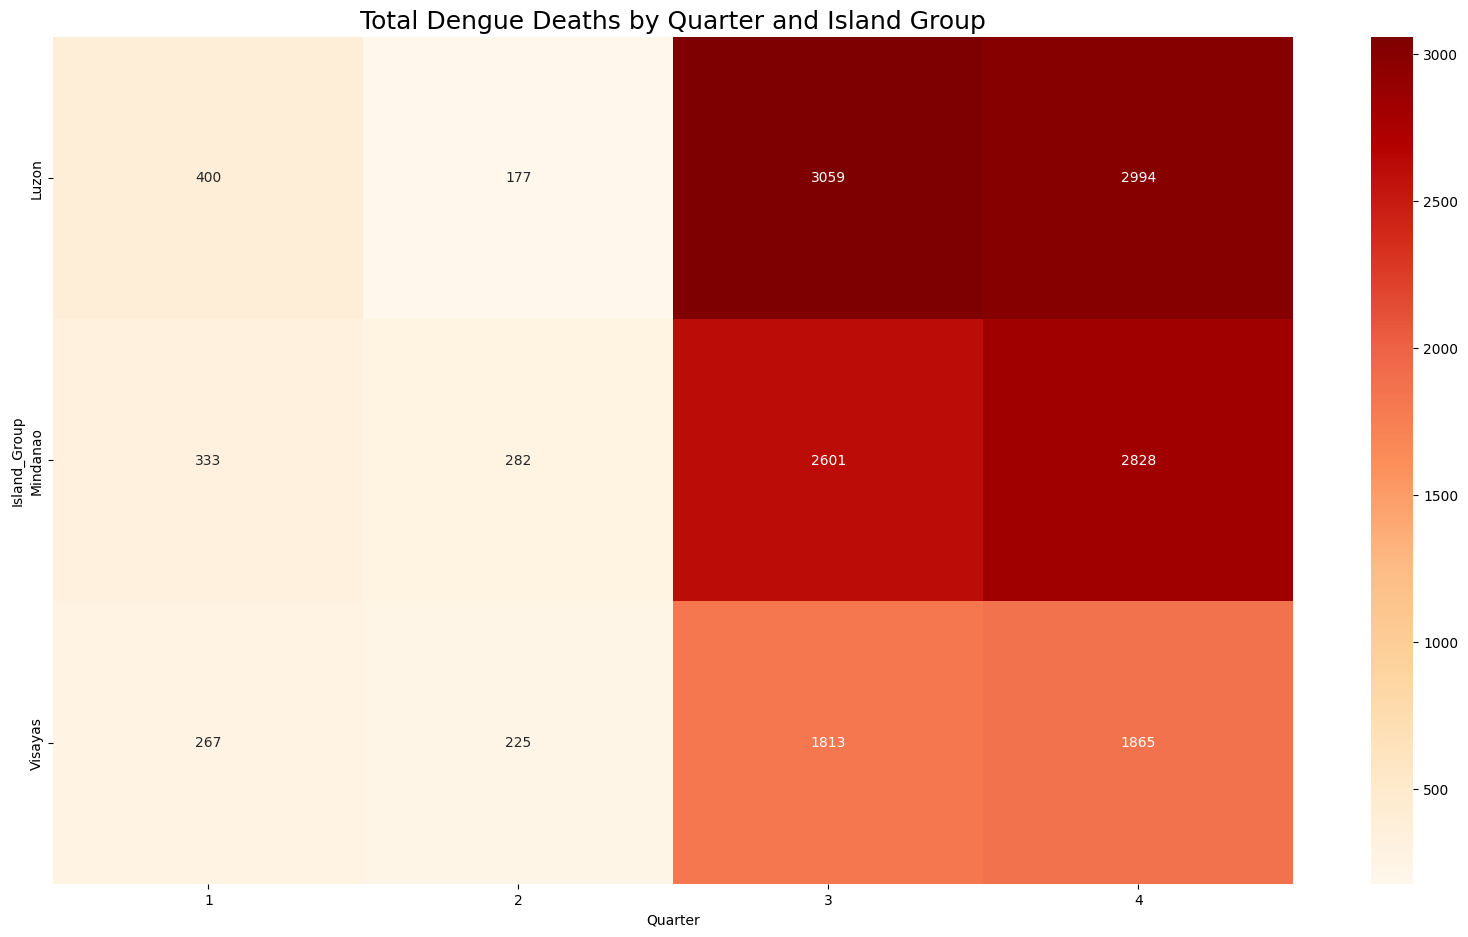

In [43]:
dengue["Quarter"] = pd.to_datetime(dengue["Month"], format="%B").dt.quarter

quarterly_deaths = dengue.pivot_table(values="Dengue_Deaths", index="Island_Group", columns="Quarter", aggfunc="sum")
plt.gcf().set_size_inches(20,11)
sns.heatmap(quarterly_deaths, cmap="OrRd", annot=True, fmt=".0f")
plt.title("Total Dengue Deaths by Quarter and Island Group", fontsize=18)
plt.show()

<h1>Insight 20</h1>
<p>Similar to case patterns, the third quarter shows a sharp increase in dengue-related deaths, especially in Luzon and Visayas.</p>
